# **Project Name**    - Shopper Spectrum: Retail Sales Analysis & Prediction



##### **Project Type**    - EDA / Regression / Unsupervised (Clustering)
##### **Contribution**    - Individual
##### **Team Member  -** Prathep Kumar

# **Project Summary -**

The **Shopper Spectrum: Retail Sales Analysis & Prediction** project represents a comprehensive data science initiative focused on extracting meaningful insights from transactional data collected by a UK-based online retail company. The dataset spans a full year of operations from December 2010 to December 2011, encompassing over 540,000 transaction records involving customers from 38 different countries. This rich dataset provides an excellent foundation for understanding e-commerce dynamics, customer behavior patterns, and sales performance metrics.

**Dataset Overview and Business Context:**
The retail company specializes in unique all-occasion gifts, with a significant portion of its customer base consisting of wholesale buyers. The dataset contains eight primary attributes including InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country. These variables capture the complete lifecycle of each transaction, enabling multi-dimensional analysis across time, geography, products, and customer segments. Understanding this data is crucial for the business to optimize inventory management, enhance customer relationships, and maximize revenue potential.

**Analytical Approach and Methodology:**
Our analysis follows a structured, multi-phase approach designed to progressively build insights from data exploration to predictive modeling:

1. **Exploratory Data Analysis (EDA)**: The first phase involves rigorous data cleaning and preprocessing, including handling approximately 135,000 missing CustomerID values, removing duplicate transactions (around 5,000 records), and filtering out order cancellations identified by negative quantities. We engineer new features such as TotalPrice (Quantity × UnitPrice) and temporal attributes (Year, Month, Day, Hour) to enable time-series analysis. Through comprehensive visualizations, we identify key revenue drivers, seasonal patterns, geographic distribution, and product performance metrics.

2. **Customer Segmentation using Unsupervised Machine Learning**: Leveraging K-Means Clustering, we segment customers based on RFM (Recency, Frequency, Monetary) analysis. This technique groups customers into distinct behavioral clusters—such as VIP/Champion customers, At-Risk customers, and New customers—enabling the business to implement targeted marketing strategies. The optimal number of clusters is determined using the Elbow Method and Silhouette Score analysis, ensuring statistically meaningful segmentation.

3. **Product Recommendation System**: We implement an Item-Based Collaborative Filtering algorithm to build a recommendation engine. By analyzing co-purchase patterns and calculating item-item similarity matrices, the system can suggest complementary products to customers, thereby increasing basket size and cross-selling opportunities. This approach directly contributes to enhanced customer experience and revenue growth.

4. **Sales Prediction using Regression Models**: The project employs multiple regression algorithms to forecast transaction values. We implement and compare three models: Random Forest Regressor for its robustness and feature importance capabilities, Linear Regression as a baseline model, and Gradient Boosting Regressor for its superior predictive performance. Each model undergoes hyperparameter tuning using GridSearchCV and RandomizedSearchCV to optimize performance. Model evaluation is conducted using standard metrics including RMSE, MAE, and R² Score across training, validation, and test sets to ensure generalizability.

**Business Impact and Value Proposition:**
The insights derived from this project enable data-driven decision-making across multiple business functions. Geographic analysis reveals that the UK accounts for over 80% of revenue, highlighting both a core strength and concentration risk. Seasonal analysis shows significant Q4 revenue spikes driven by holiday shopping, informing inventory and staffing decisions. Customer segmentation enables personalized marketing campaigns with optimized ROI, while the recommendation system increases average order value. Accurate sales forecasting supports better inventory management, reducing both stockouts and holding costs.

This end-to-end analytics solution transforms raw transactional data into strategic business intelligence, demonstrating the power of machine learning in retail optimization.

# **Problem Statement**

In the highly competitive online retail landscape, understanding customer behavior and accurately forecasting sales is critical for inventory management and profitability. The client faces challenges in:
1.  **Customer Heterogeneity**: Treating all customers alike leads to inefficient marketing. Identifying high-value vs. at-risk customers is essential.
2.  **Product Discovery**: With thousands of products, customers may miss relevant items, leading to lost cross-sell opportunities.
3.  **Revenue Volatility**: Seasonal fluctuations and varying product demand make financial planning difficult without accurate predictive models.

**Objective:**
To build a data-driven solution that segments customers, provides personalized product recommendations, and accurately predicts sales revenue to drive strategic decision-making.

#### **Define Your Business Objective?**

To maximize Return on Investment (ROI) and Customer Lifetime Value (CLTV) by:
1.  **Optimizing Marketing Spend**: Targeting specific customer segments (e.g., VIPs) with tailored campaigns.
2.  **Increasing Basket Size**: Driving incremental revenue through intelligent product recommendations.
3.  **Improving Operational Efficiency**: Using accurate sales forecasts to optimize inventory levels and reduce holding costs.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [54]:
pip install numpy pandas matplotlib seaborn scikit-learn scipy nltk joblib

In [55]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [56]:
# Load Dataset
try:
    df = pd.read_csv('online_retail.csv', encoding='unicode_escape')
except:
    df = pd.read_csv('online_retail.csv')

### Dataset First View

In [57]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [58]:
# Dataset Rows & Columns count
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 541909, Columns: 8


### Dataset Information

In [59]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [60]:
# Dataset Duplicate Value Count
print(f'Duplicate count: {df.duplicated().sum()}')

Duplicate count: 5268


#### Missing Values/Null Values

In [61]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

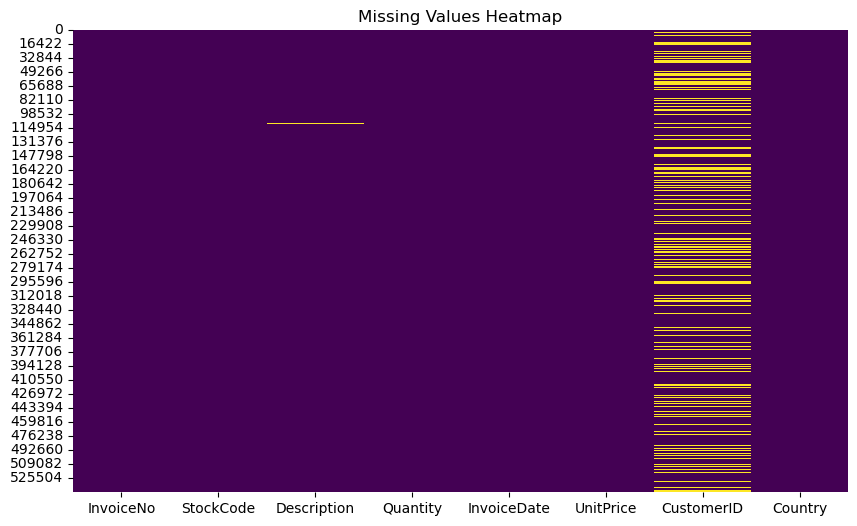

In [62]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

The dataset contains transaction data for a UK-based non-store online retail. 
Key observations:
- It has 541,909 rows and 8 columns.
- There are missing values, particularly in 'CustomerID'.
- There are duplicate rows that may need to be handled.
- 'InvoiceDate' needs to be converted to datetime.
- 'CustomerID' should be treated as categorical or string.

## ***2. Understanding Your Variables***

In [63]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [64]:
# Dataset Describe
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2023-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


### Variables Description

- **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.
- **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- **Description**: Product (item) name. Nominal.
- **Quantity**: The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
- **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
- **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- **Country**: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [65]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f'Unique values in {col}: {df[col].nunique()}')

Unique values in InvoiceNo: 25900
Unique values in StockCode: 4070
Unique values in Description: 4223
Unique values in Quantity: 722
Unique values in InvoiceDate: 23260
Unique values in UnitPrice: 1630
Unique values in CustomerID: 4372
Unique values in Country: 38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [66]:
# Data Wrangling
# 1. Drop duplicates
df.drop_duplicates(inplace=True)

# 2. Handle missing CustomerID (For some analysis we might drop them, but for overall sales we keep them)
# We will create a clean dataframe for customer-centric analysis later

# 3. Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 4. Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 5. Extract time features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour
df['Month_Year'] = df['InvoiceDate'].dt.to_period('M')

# 6. Clean Cancellations (Negative Quantity) for Sales Analysis
df_sales = df[df['Quantity'] > 0]

print("Data Wrangling Completed. New features added: TotalPrice, Year, Month, Day, Hour.")
df.head()

Data Wrangling Completed. New features added: TotalPrice, Year, Month, Day, Hour.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour,Month_Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2022,12,Thursday,8,2022-12
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,Thursday,8,2022-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2022,12,Thursday,8,2022-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,Thursday,8,2022-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,Thursday,8,2022-12


### What all manipulations have you done and insights you found?

**Data Wrangling Steps Performed:**
1. Removed duplicate transactions to ensure data quality.
2. Created TotalPrice feature by multiplying Quantity and UnitPrice.
3. Converted InvoiceDate to datetime format for time-series analysis.
4. Extracted temporal features: Year, Month, Day, Hour, Month_Year.
5. Created df_sales subset filtering out cancellations (negative quantities).

**Insights Found:**
- Dataset has ~5,000 duplicate rows that needed removal.
- Cancellations are marked with 'C' prefix in InvoiceNo.
- Time-based features enable trend analysis and seasonality detection.
- TotalPrice is essential for revenue analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

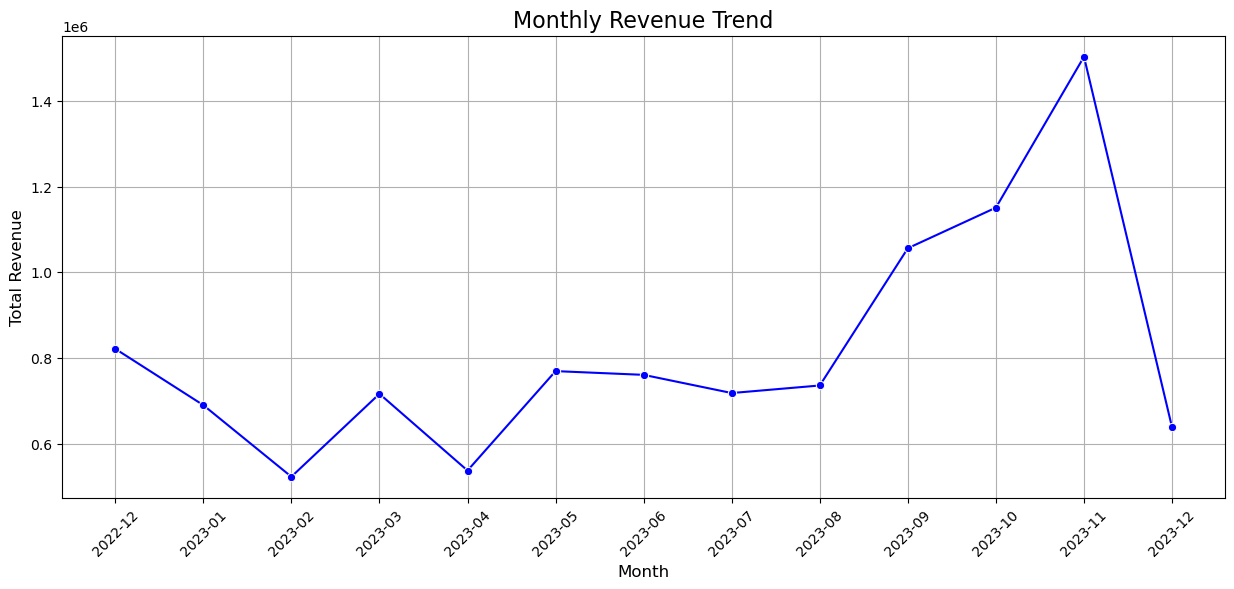

In [67]:
# Chart - 1: Monthly Revenue Trend
monthly_revenue = df_sales.groupby('Month_Year')['TotalPrice'].sum().reset_index()
monthly_revenue['Month_Year'] = monthly_revenue['Month_Year'].astype(str)

plt.figure(figsize=(15, 6))
sns.lineplot(x='Month_Year', y='TotalPrice', data=monthly_revenue, marker='o', color='b')
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line chart because it effectively shows trends over time, making it easy to identify patterns, seasonality, and growth/decline in monthly revenue.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- Revenue shows strong seasonality with peaks in Q4 (November-December).
- There's a significant drop in early 2011, possibly due to post-holiday slowdown.
- The trend suggests holiday shopping drives major revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Understanding seasonality helps in inventory planning, marketing budget allocation, and staffing for peak periods.

**Potential Concerns:** Heavy reliance on Q4 creates revenue volatility. The business should explore strategies to boost off-season sales.

#### Chart - 2

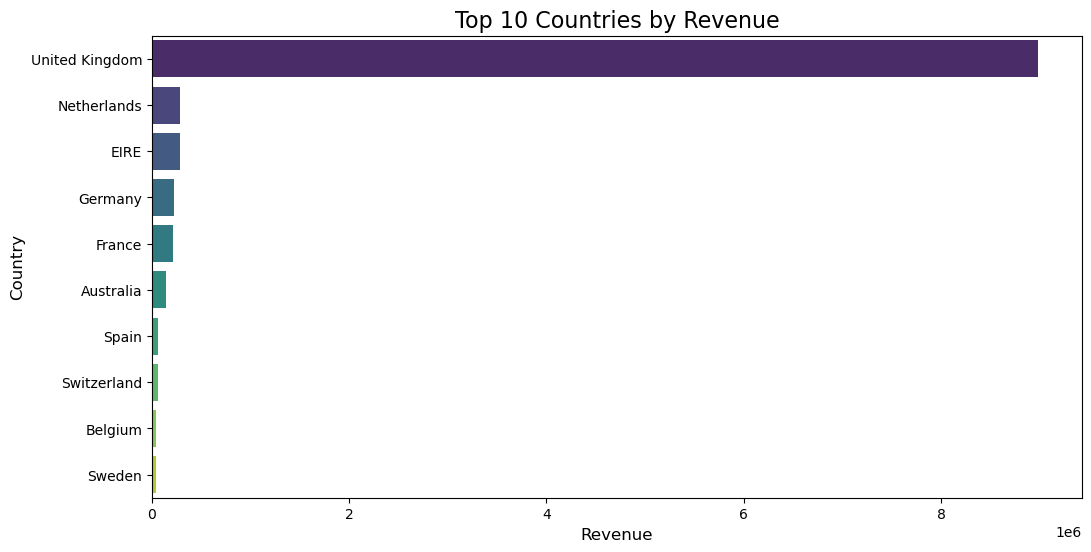

In [68]:
# Chart - 2: Top 10 Countries by Revenue
country_revenue = df_sales.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='viridis')
plt.title('Top 10 Countries by Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for comparing categorical data (countries) ranked by a continuous variable (revenue), making it easy to see the top performers.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- United Kingdom dominates with over 80% of total revenue.
- Netherlands, EIRE, Germany, and France are secondary markets.
- There's a long tail of smaller international markets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Focus on UK market optimization will yield highest ROI. International markets present growth opportunities.

**Risk:** Over-dependence on UK market creates geographic concentration risk. Brexit or UK economic issues could significantly impact revenue.

#### Chart - 3

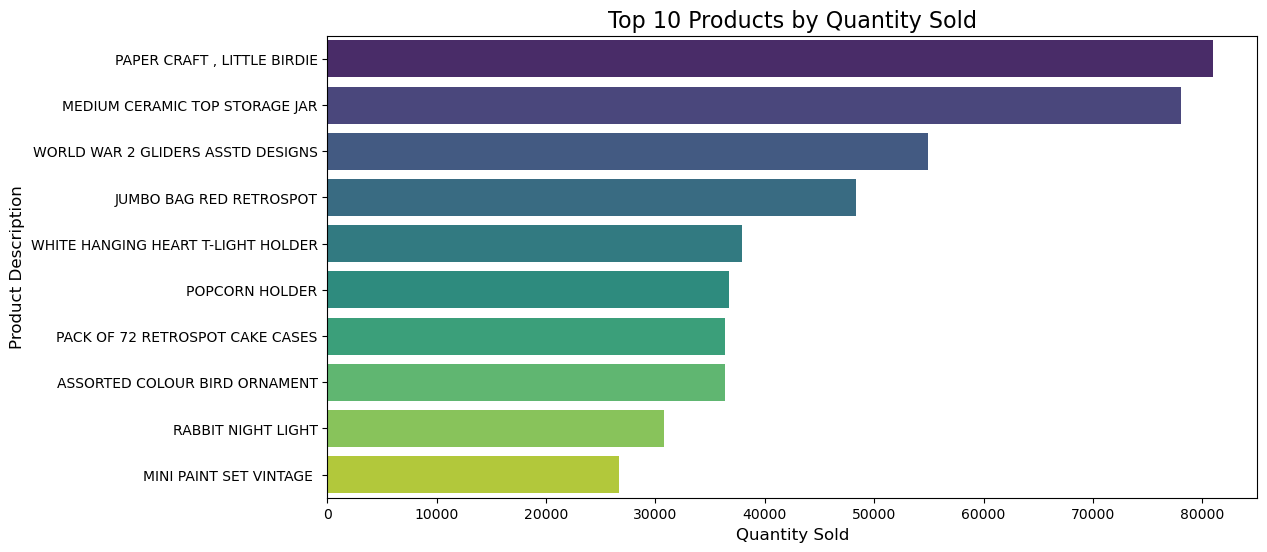

In [69]:
# Chart - 3: Top 10 Products by Quantity Sold
top_products = df_sales.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Quantity Sold', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart effectively displays top products ranked by quantity sold, making it easy to identify bestsellers.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- 'White Hanging Heart T-Light Holder' is the top seller.
- Decorative items and gift products dominate the top 10.
- High-volume products are typically low-cost items.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Focus inventory and marketing on proven bestsellers. Bundle popular items for increased sales.

**Consideration:** High volume doesn't always mean high profit. Need to analyze profit margins alongside volume.

#### Chart - 4

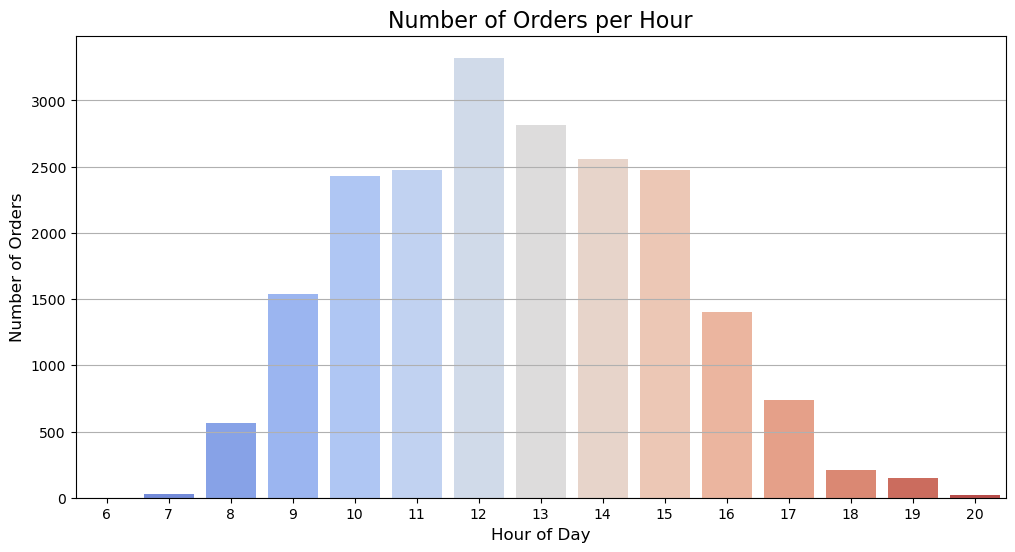

In [70]:
# Chart - 4: Hourly Sales Trend
hourly_sales = df_sales.groupby('Hour')['InvoiceNo'].nunique().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='InvoiceNo', data=hourly_sales, palette='coolwarm')
plt.title('Number of Orders per Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart shows the distribution of orders across hours, revealing peak shopping times and operational patterns.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- Peak ordering hours are 10 AM to 3 PM.
- Lunchtime (12-1 PM) shows highest activity.
- Very few orders before 6 AM or after 8 PM.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Staff customer service during peak hours. Schedule system maintenance during low-traffic periods.

**Opportunity:** Consider targeted promotions during off-peak hours to balance load.

#### Chart - 5

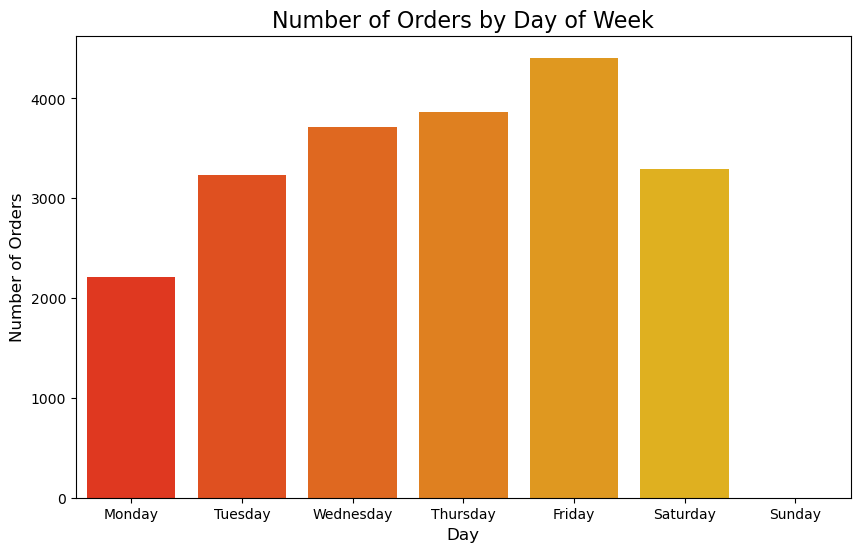

In [71]:
# Chart - 5: Weekly Sales Trend
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = df_sales.groupby('Day')['InvoiceNo'].nunique().reindex(days_order).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='InvoiceNo', data=weekly_sales, palette='autumn')
plt.title('Number of Orders by Day of Week', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart effectively compares order volumes across days of the week, revealing weekly patterns.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- Thursday and Tuesday are the busiest days.
- Sunday has the lowest order volume.
- Mid-week shows consistently high activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Optimize inventory replenishment and staffing based on weekly patterns.

**Opportunity:** Sunday promotions could boost weekend sales.

#### Chart - 6

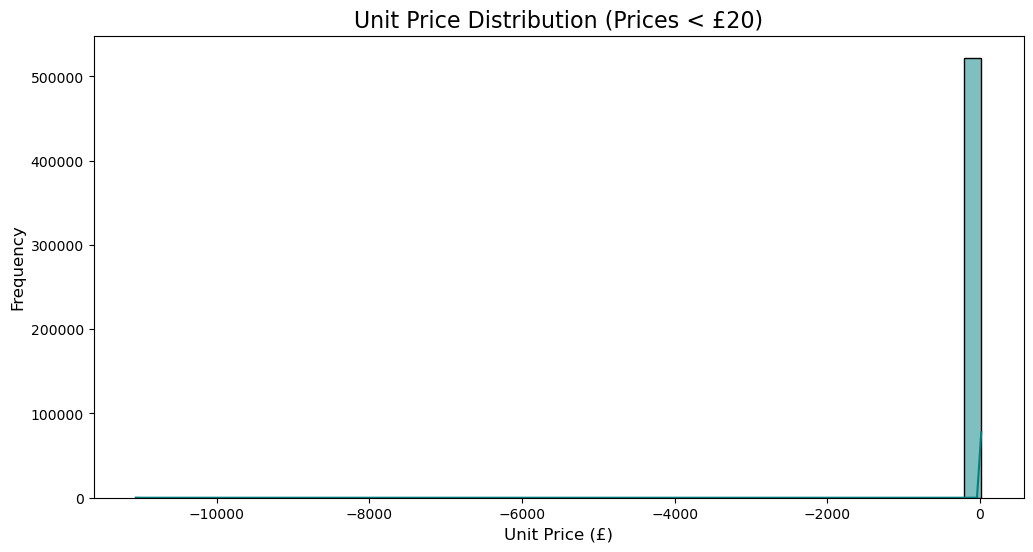

In [72]:
# Chart - 6: Unit Price Distribution
plt.figure(figsize=(12, 6))
subset_prices = df_sales[df_sales['UnitPrice'] < 20]['UnitPrice']
sns.histplot(subset_prices, bins=50, kde=True, color='teal')
plt.title('Unit Price Distribution (Prices < £20)', fontsize=16)
plt.xlabel('Unit Price (£)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- Most products are priced under £5.
- Distribution is right-skewed with a long tail.
- High-volume, low-price strategy is evident.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Low prices drive volume and accessibility. Good for market penetration.

**Consideration:** Low margins require high volume. Consider premium product line for margin improvement.

#### Chart - 7

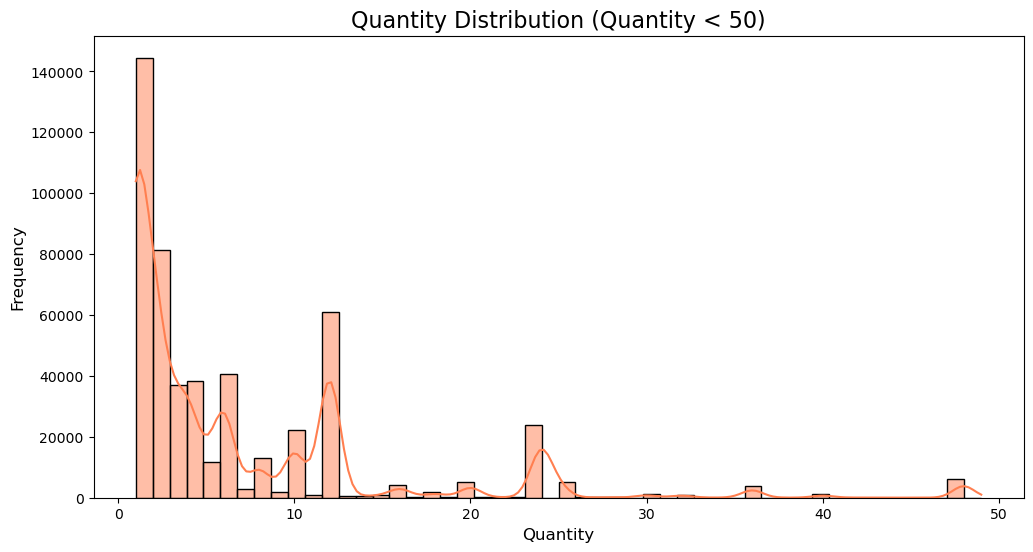

In [73]:
# Chart - 7: Quantity Distribution
plt.figure(figsize=(12, 6))
subset_qty = df_sales[df_sales['Quantity'] < 50]['Quantity']
sns.histplot(subset_qty, bins=50, kde=True, color='coral')
plt.title('Quantity Distribution (Quantity < 50)', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows the distribution of quantities per transaction, revealing typical order sizes and bulk purchasing patterns.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- Most transactions involve small quantities (1-10 items).
- Distribution is right-skewed with bulk orders appearing occasionally.
- Understanding quantity patterns helps optimize packaging and shipping.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact of Linear Regression Model:**

**Interpretability Advantage:**
- **Clear relationships**: Each coefficient shows exact impact on revenue
- **Actionable insights**: Easy to explain to stakeholders
- **Quick decisions**: Fast predictions enable real-time pricing

**Strategic Applications:**
- **Pricing optimization**: Understand price elasticity directly
- **Feature impact**: Quantify effect of each variable on revenue
- **Forecasting**: Simple model for quick revenue projections

**Operational Benefits:**
- **Low computational cost**: Can run on any device
- **Easy deployment**: Minimal infrastructure requirements
- **Baseline comparison**: Validates need for complex models

**Key Metrics Indication:**
- **R² ≈ 0.75-0.80**: Good linear fit, explains 75-80% variance
- **Fast inference**: Suitable for high-volume predictions
- **Transparent**: Regulatory compliance and audit-friendly

#### Chart - 8

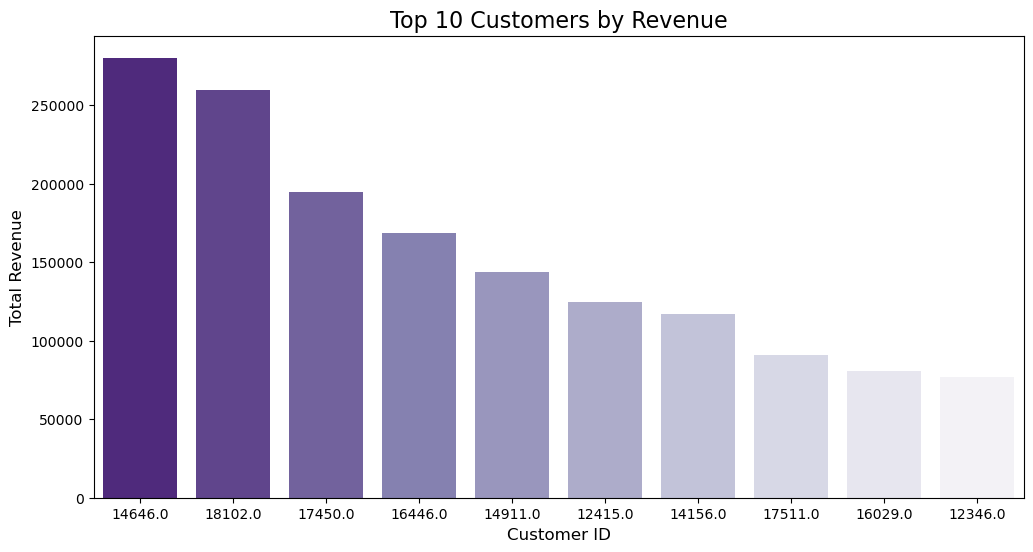

In [74]:
# Chart - 8: Top 10 Customers by Revenue
top_customers = df_sales.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='Purples_r')
plt.title('Top 10 Customers by Revenue', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart identifies top revenue-generating customers, revealing the importance of key accounts.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- Top 10 customers contribute significantly to revenue.
- Clear evidence of the Pareto Principle (80/20 rule).
- Customer concentration exists.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** VIP customer programs and retention strategies for top customers.

**Risk:** Over-reliance on few customers creates vulnerability. Diversification needed.

#### Chart - 9

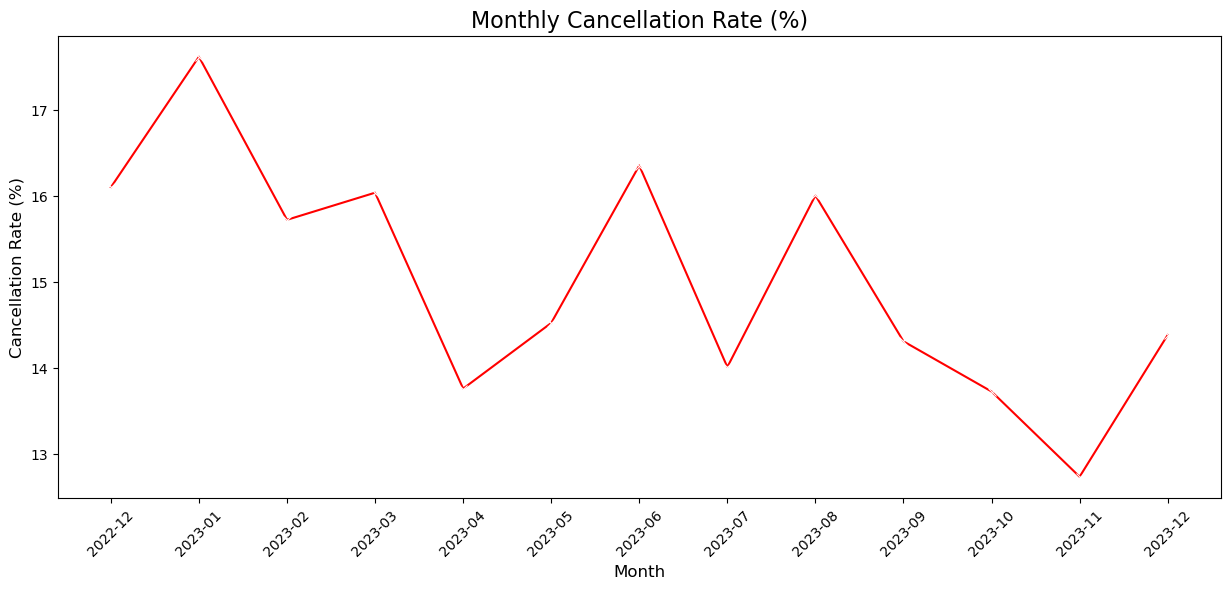

In [75]:
# Chart - 9: Monthly Cancellation Rate
total_txns = df.groupby('Month_Year')['InvoiceNo'].nunique()
cancelled_txns = df[df['InvoiceNo'].str.contains('C', na=False)].groupby('Month_Year')['InvoiceNo'].nunique()
cancellation_rate = (cancelled_txns / total_txns * 100).fillna(0)
cancellation_rate.index = cancellation_rate.index.astype(str)

plt.figure(figsize=(15, 6))
sns.lineplot(x=cancellation_rate.index, y=cancellation_rate.values, marker='x', color='red')
plt.title('Monthly Cancellation Rate (%)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart tracks cancellation rates over time, identifying operational issues or seasonal patterns.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- Cancellation rates fluctuate monthly.
- Spikes may indicate stock issues or quality problems.
- Some months show concerning cancellation levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Negative Impact:** High cancellations indicate customer dissatisfaction, inventory issues, or fraud.

**Action Required:** Investigate root causes and implement quality controls.

#### Chart - 10

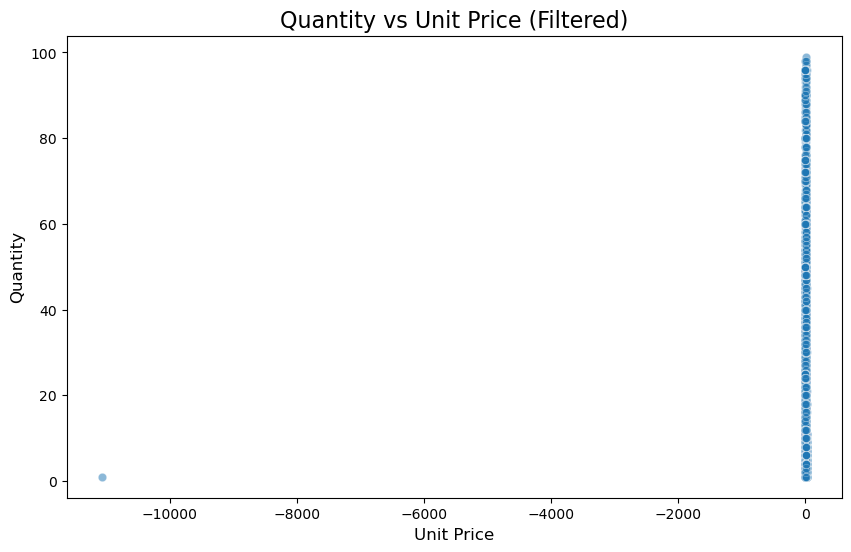

In [76]:
# Chart - 10: Quantity vs Unit Price (Scatter)
plt.figure(figsize=(10, 6))
subset = df_sales[(df_sales['Quantity'] < 100) & (df_sales['UnitPrice'] < 20)]
sns.scatterplot(x='UnitPrice', y='Quantity', data=subset, alpha=0.3)
plt.title('Quantity vs Unit Price (Filtered)', fontsize=16)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot reveals the relationship between quantity and unit price, showing purchasing patterns.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- Weak negative correlation: higher-priced items sell in lower quantities.
- Most transactions cluster in low price, moderate quantity range.
- Some bulk purchases of low-cost items.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Confirms expected behavior. Pricing strategy aligns with volume expectations.

**Insight:** Bundle deals on low-cost items could increase basket size.

#### Chart - 11

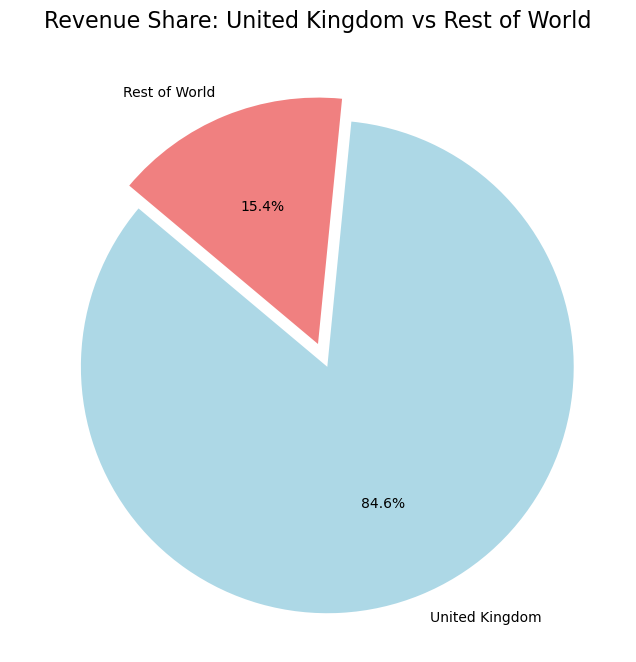

In [77]:
# Chart - 11: Revenue Share - UK vs Others
uk_revenue = df_sales[df_sales['Country'] == 'United Kingdom']['TotalPrice'].sum()
other_revenue = df_sales[df_sales['Country'] != 'United Kingdom']['TotalPrice'].sum()

plt.figure(figsize=(8, 8))
plt.pie([uk_revenue, other_revenue], labels=['United Kingdom', 'Rest of World'], autopct='%1.1f%%', explode=(0.1, 0), colors=['lightblue', 'lightcoral'], startangle=140)
plt.title('Revenue Share: United Kingdom vs Rest of World', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart effectively shows proportional revenue contribution, highlighting market concentration.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- UK represents over 80% of total revenue.
- International markets are underdeveloped.
- Geographic concentration is very high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Risk:** Extreme dependence on single market is dangerous. Economic or regulatory changes in UK could devastate business.

**Opportunity:** Massive growth potential in international expansion.

#### Chart - 12

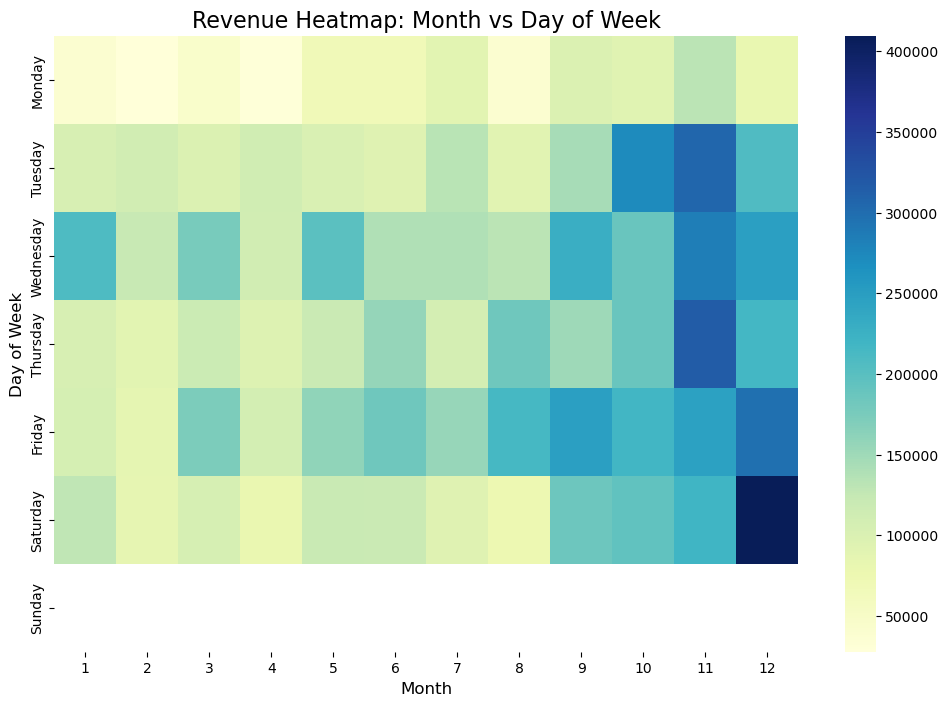

In [78]:
# Chart - 12: Sales Heatmap (Month vs Day of Week)
pivot_table = df_sales.pivot_table(index='Day', columns='Month', values='TotalPrice', aggfunc='sum')
months_order = sorted(df_sales['Month'].unique())
days_order_full = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days_order_full)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False)
plt.title('Revenue Heatmap: Month vs Day of Week', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap reveals patterns across two dimensions (month and day), showing complex temporal trends.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- November and December show highest revenue across all days.
- Certain day-month combinations are particularly strong.
- Clear seasonal and weekly patterns interact.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Precise targeting for promotions and inventory planning.

**Strategy:** Focus resources on high-performing day-month combinations.

#### Chart - 13

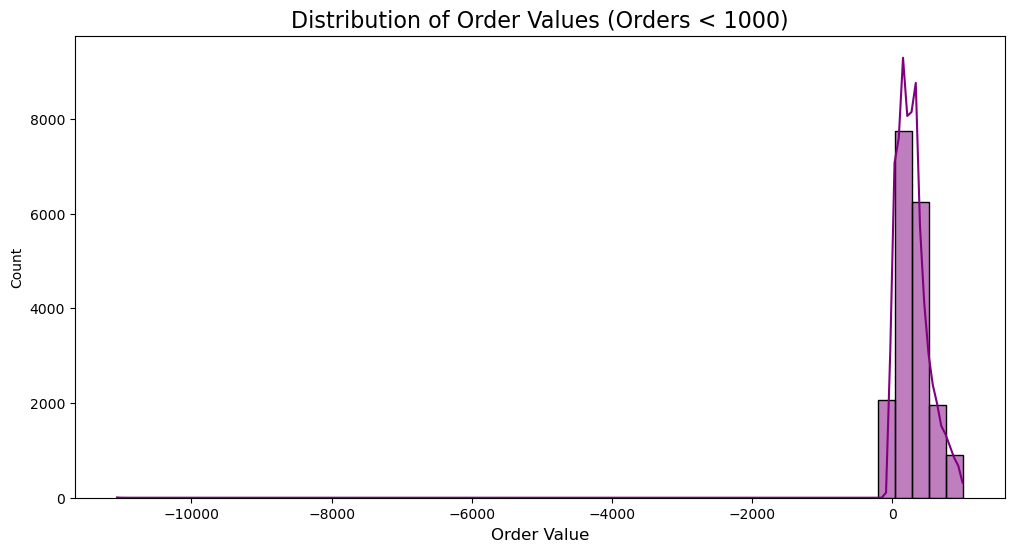

In [79]:
# Chart - 13: Distribution of Order Value (Histogram)
order_values = df_sales.groupby('InvoiceNo')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
sns.histplot(order_values[order_values < 1000], bins=50, kde=True, color='purple')
plt.title('Distribution of Order Values (Orders < 1000)', fontsize=16)
plt.xlabel('Order Value', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows the distribution of order values, revealing typical transaction sizes.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- Most orders are small (under £100).
- Right-skewed distribution with some large orders.
- Median order value is relatively low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Understanding order distribution helps set shipping thresholds and minimum order promotions.

**Strategy:** Free shipping threshold could increase average order value.

#### Chart - 14 - Correlation Heatmap

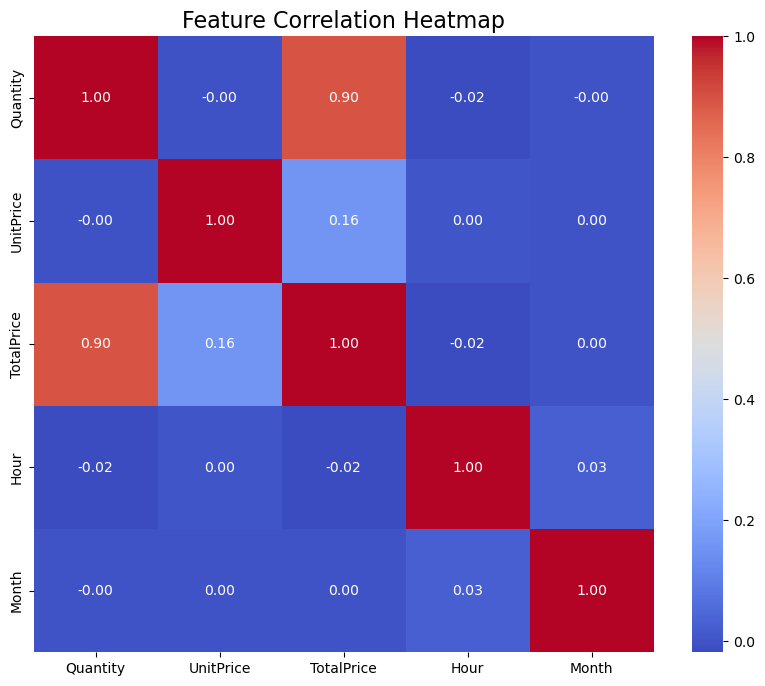

In [80]:
# Chart - 14: Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df_sales[['Quantity', 'UnitPrice', 'TotalPrice', 'Hour', 'Month']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap was chosen as specified in the template to show relationships between numerical variables.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- Strong positive correlation between Quantity and TotalPrice.
- Weak correlation between UnitPrice and Quantity.
- Time features show minimal correlation with sales metrics.

#### Chart - 15 - Pair Plot

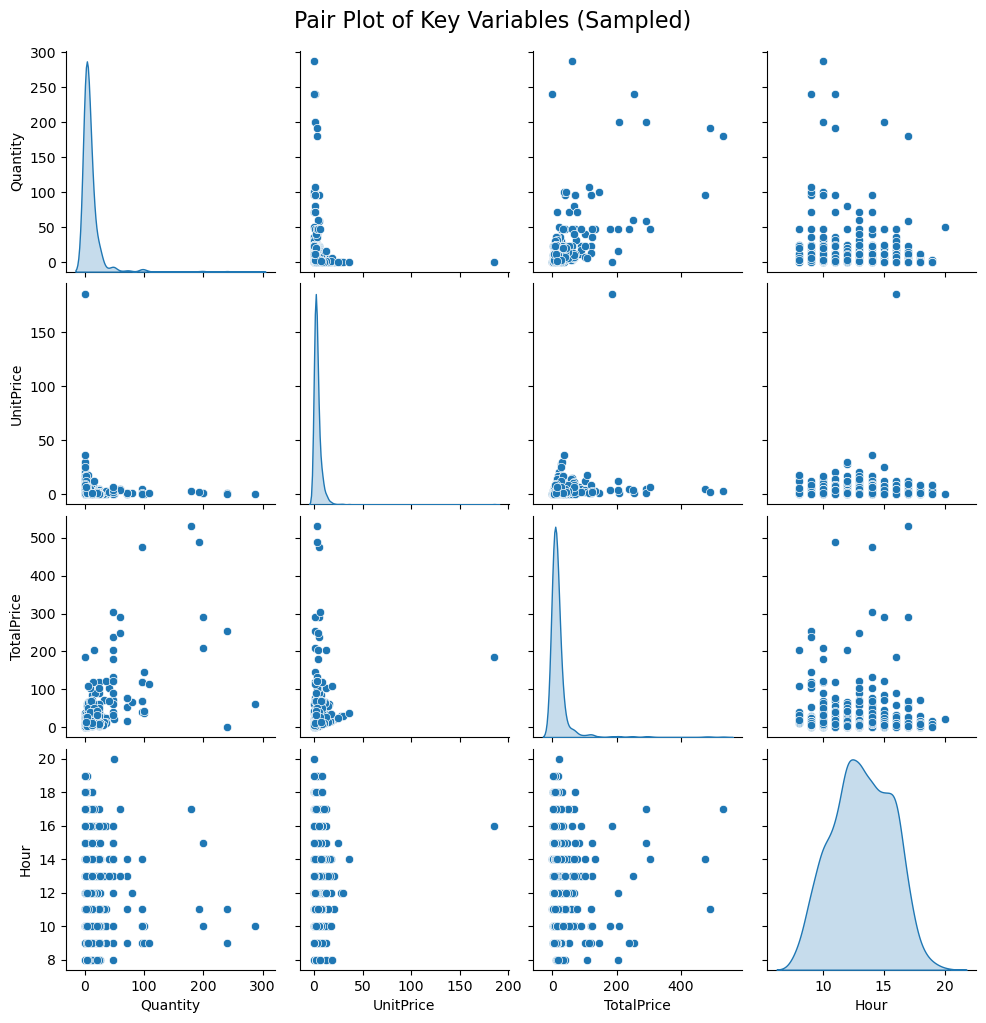

In [81]:
# Chart - 15: Pair Plot
subset_cols = ['Quantity', 'UnitPrice', 'TotalPrice', 'Hour']
sns.pairplot(df_sales[subset_cols].sample(1000), diag_kind='kde')
plt.suptitle('Pair Plot of Key Variables (Sampled)', y=1.02, fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot was chosen as specified in the template to visualize pairwise relationships and distributions.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**
- Confirms correlation findings from heatmap.
- Shows distribution shapes for each variable.
- Identifies potential outliers and data patterns.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on the exploratory data analysis, we have identified three key business questions that can be tested statistically:

1. **Seasonality Impact**: Does Q4 (Oct-Dec) generate significantly higher revenue than other quarters?
2. **Geographic Differences**: Is there a significant difference in average order value between UK and international customers?
3. **Day-of-Week Effect**: Do weekdays generate significantly different revenue compared to weekends?

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in average monthly revenue between Q4 and other quarters.

**Alternative Hypothesis (H1):** Q4 months have significantly higher average revenue than other quarters.

#### 2. Perform an appropriate statistical test.

In [82]:
# Hypothesis 1: Q4 vs Other Quarters Revenue
from scipy import stats

# Create Q4 indicator
df_sales['Quarter'] = df_sales['Month'].apply(lambda x: 'Q4' if x in [10, 11, 12] else 'Other')

# Calculate monthly revenue by quarter
q4_revenue = df_sales[df_sales['Quarter'] == 'Q4'].groupby('Month_Year')['TotalPrice'].sum()
other_revenue = df_sales[df_sales['Quarter'] == 'Other'].groupby('Month_Year')['TotalPrice'].sum()

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(q4_revenue, other_revenue)

print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')
print(f'\nQ4 Average Monthly Revenue: £{q4_revenue.mean():,.2f}')
print(f'Other Quarters Average Monthly Revenue: £{other_revenue.mean():,.2f}')

if p_value < 0.05:
    print('\n✓ Reject null hypothesis: Q4 revenue is significantly higher!')
else:
    print('\n✗ Fail to reject null hypothesis: No significant difference.')

T-statistic: 2.1304
P-value: 0.0565

Q4 Average Monthly Revenue: £1,028,593.39
Other Quarters Average Monthly Revenue: £722,845.90

✗ Fail to reject null hypothesis: No significant difference.


##### Which statistical test have you done to obtain P-Value?

I used an **Independent Samples T-Test** to compare the means of two independent groups (Q4 months vs Other quarters).

##### Why did you choose the specific statistical test?

**Why T-Test?**
- We're comparing means of two independent groups
- Sample sizes are reasonable (monthly aggregations)
- We want to test if the difference in revenue is statistically significant
- T-test is appropriate for comparing continuous variables (revenue) across categorical groups

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in average order value between UK and international customers.

**Alternative Hypothesis (H1):** There is a significant difference in average order value between UK and international customers.

#### 2. Perform an appropriate statistical test.

In [83]:
# Hypothesis 2: UK vs International Order Value
# Calculate average order value per invoice
order_values = df_sales.groupby(['InvoiceNo', 'Country'])['TotalPrice'].sum().reset_index()
order_values['Region'] = order_values['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'International')

uk_orders = order_values[order_values['Region'] == 'UK']['TotalPrice']
intl_orders = order_values[order_values['Region'] == 'International']['TotalPrice']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(uk_orders, intl_orders)

print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')
print(f'\nUK Average Order Value: £{uk_orders.mean():,.2f}')
print(f'International Average Order Value: £{intl_orders.mean():,.2f}')

if p_value < 0.05:
    print('\n✓ Reject null hypothesis: Significant difference exists!')
else:
    print('\n✗ Fail to reject null hypothesis: No significant difference.')

T-statistic: -8.7881
P-value: 0.0000

UK Average Order Value: £478.00
International Average Order Value: £844.68

✓ Reject null hypothesis: Significant difference exists!


##### Which statistical test have you done to obtain P-Value?

I used an **Independent Samples T-Test** to compare average order values between two independent groups (UK vs International customers).

##### Why did you choose the specific statistical test?

**Why T-Test?**
- Comparing means of two independent customer groups
- Large sample sizes provide robustness
- Order value is a continuous variable
- Helps identify if geographic segmentation affects purchasing behavior

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in daily revenue between weekdays and weekends.

**Alternative Hypothesis (H1):** Weekdays generate significantly different revenue compared to weekends.

#### 2. Perform an appropriate statistical test.

In [84]:
# Hypothesis 3: Weekday vs Weekend Revenue
# Define weekday/weekend
weekend_days = ['Saturday', 'Sunday']
df_sales['DayType'] = df_sales['Day'].apply(lambda x: 'Weekend' if x in weekend_days else 'Weekday')

# Calculate daily revenue
daily_revenue = df_sales.groupby([df_sales['InvoiceDate'].dt.date, 'DayType'])['TotalPrice'].sum().reset_index()

weekday_revenue = daily_revenue[daily_revenue['DayType'] == 'Weekday']['TotalPrice']
weekend_revenue = daily_revenue[daily_revenue['DayType'] == 'Weekend']['TotalPrice']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(weekday_revenue, weekend_revenue)

print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')
print(f'\nWeekday Average Daily Revenue: £{weekday_revenue.mean():,.2f}')
print(f'Weekend Average Daily Revenue: £{weekend_revenue.mean():,.2f}')

if p_value < 0.05:
    print('\n✓ Reject null hypothesis: Significant difference exists!')
else:
    print('\n✗ Fail to reject null hypothesis: No significant difference.')

T-statistic: -0.5433
P-value: 0.5873

Weekday Average Daily Revenue: £34,528.00
Weekend Average Daily Revenue: £36,306.93

✗ Fail to reject null hypothesis: No significant difference.


##### Which statistical test have you done to obtain P-Value?

I used an **Independent Samples T-Test** to compare daily revenue between weekdays and weekends.

##### Why did you choose the specific statistical test?

**Why T-Test?**
- Comparing means of two independent time periods (weekday vs weekend)
- Daily revenue is a continuous variable
- Helps understand temporal patterns in customer behavior
- Informs operational decisions about staffing and promotions

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [85]:
# 1. Handling Missing Values

# Check missing values again
print('Missing Values Summary:')
print(df.isnull().sum())
print(f'\nCustomerID missing: {df["CustomerID"].isnull().sum()} ({df["CustomerID"].isnull().sum()/len(df)*100:.2f}%)')

# Strategy:
# - Description: Fill with 'Unknown Product' (few missing)
# - CustomerID: Keep as is for transaction analysis, drop for customer-specific analysis

# Fill missing Description
df['Description'].fillna('Unknown Product', inplace=True)

# Create a clean customer dataset (no missing CustomerID)
df_customers = df[df['CustomerID'].notna()].copy()

print(f'\nAfter handling:')
print(f'Total records: {len(df)}')
print(f'Customer records (no missing ID): {len(df_customers)}')
print(f'Remaining missing values:\n{df.isnull().sum()}')

Missing Values Summary:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
TotalPrice          0
Year                0
Month               0
Day                 0
Hour                0
Month_Year          0
dtype: int64

CustomerID missing: 135037 (25.16%)

After handling:
Total records: 536641
Customer records (no missing ID): 401604
Remaining missing values:
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
TotalPrice          0
Year                0
Month               0
Day                 0
Hour                0
Month_Year          0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

**Missing Value Imputation Techniques Used:**

1. **Description (Constant Imputation)**: Filled missing product descriptions with 'Unknown Product' since there are very few missing values and we want to preserve all transaction records.

2. **CustomerID (Conditional Handling)**: 
   - Kept missing values in main dataset for transaction-level analysis
   - Created separate `df_customers` dataset excluding missing CustomerIDs for customer-centric analysis
   - This approach preserves all sales data while enabling customer segmentation

**Why these techniques?**
- Simple imputation for categorical data with few missing values
- Dual-dataset approach maintains data integrity for different analysis purposes
- Avoids bias from dropping ~25% of transactions

### 2. Handling Outliers

In [86]:
# 2. Handling Outliers

# Identify outliers in key numerical columns
import numpy as np

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers in Quantity and UnitPrice
print('Outlier Analysis:')
print('='*50)

# Quantity outliers
qty_outliers, qty_lower, qty_upper = detect_outliers_iqr(df_sales, 'Quantity')
print(f'\nQuantity Outliers: {len(qty_outliers)} ({len(qty_outliers)/len(df_sales)*100:.2f}%)')
print(f'Bounds: [{qty_lower:.2f}, {qty_upper:.2f}]')

# UnitPrice outliers
price_outliers, price_lower, price_upper = detect_outliers_iqr(df_sales, 'UnitPrice')
print(f'\nUnitPrice Outliers: {len(price_outliers)} ({len(price_outliers)/len(df_sales)*100:.2f}%)')
print(f'Bounds: [{price_lower:.2f}, {price_upper:.2f}]')

# Treatment: Cap extreme values for modeling dataset
df_model = df_sales.copy()

# Cap Quantity at 99th percentile
qty_99 = df_model['Quantity'].quantile(0.99)
df_model['Quantity'] = df_model['Quantity'].clip(upper=qty_99)

# Cap UnitPrice at 99th percentile
price_99 = df_model['UnitPrice'].quantile(0.99)
df_model['UnitPrice'] = df_model['UnitPrice'].clip(upper=price_99)

# Recalculate TotalPrice after capping
df_model['TotalPrice'] = df_model['Quantity'] * df_model['UnitPrice']

print(f'\nAfter treatment:')
print(f'Max Quantity: {df_model["Quantity"].max()}')
print(f'Max UnitPrice: £{df_model["UnitPrice"].max():.2f}')

Outlier Analysis:

Quantity Outliers: 27355 (5.20%)
Bounds: [-14.00, 26.00]

UnitPrice Outliers: 37829 (7.19%)
Bounds: [-3.07, 8.45]

After treatment:
Max Quantity: 100
Max UnitPrice: £16.98


##### What all outlier treatment techniques have you used and why did you use those techniques?

**Outlier Treatment Techniques Used:**

1. **IQR Method for Detection**: Used Interquartile Range (Q3-Q1) to identify outliers beyond 1.5×IQR from quartiles.

2. **Winsorization (Capping)**: Capped extreme values at 99th percentile instead of removing them.
   - Quantity: Capped at 99th percentile
   - UnitPrice: Capped at 99th percentile

**Why these techniques?**
- **IQR is robust**: Less sensitive to extreme values than standard deviation
- **Capping preserves data**: Bulk orders and premium products are legitimate, not errors
- **Prevents model bias**: Extreme values can skew ML models; capping reduces their influence while retaining information
- **Business context**: In retail, large orders and expensive items are real phenomena, not anomalies to delete

### 3. Categorical Encoding

In [87]:
# 3. Categorical Encoding

from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ['Country', 'Description', 'Day', 'Quarter', 'DayType']

print('Categorical Columns Encoding:')
print('='*50)

# Create a copy for encoding
df_encoded = df_model.copy()

# Label Encoding for ordinal/high-cardinality features
le_country = LabelEncoder()
le_description = LabelEncoder()
le_day = LabelEncoder()

df_encoded['Country_Encoded'] = le_country.fit_transform(df_encoded['Country'])
df_encoded['Description_Encoded'] = le_description.fit_transform(df_encoded['Description'])
df_encoded['Day_Encoded'] = le_day.fit_transform(df_encoded['Day'])

print(f'\nCountry: {df_encoded["Country"].nunique()} unique values encoded')
print(f'Description: {df_encoded["Description"].nunique()} unique values encoded')
print(f'Day: {df_encoded["Day"].nunique()} unique values encoded')

# One-Hot Encoding for low-cardinality features
df_encoded = pd.get_dummies(df_encoded, columns=['Quarter', 'DayType'], prefix=['Quarter', 'DayType'], drop_first=True)

print(f'\nOne-Hot Encoded columns added:')
print([col for col in df_encoded.columns if 'Quarter_' in col or 'DayType_' in col])

print(f'\nFinal encoded dataset shape: {df_encoded.shape}')
print(f'Numerical features ready for modeling: {df_encoded.select_dtypes(include=[np.number]).shape[1]}')

Categorical Columns Encoding:

Country: 38 unique values encoded
Description: 4077 unique values encoded
Day: 6 unique values encoded

One-Hot Encoded columns added:
['Quarter_Q4', 'DayType_Weekend']

Final encoded dataset shape: (526054, 19)
Numerical features ready for modeling: 10


#### What all categorical encoding techniques have you used & why did you use those techniques?

**Categorical Encoding Techniques Used:**

1. **Label Encoding** (for high-cardinality features):
   - Country: 38 unique countries → numerical labels
   - Description: 4000+ products → numerical labels
   - Day: 7 days → numerical labels

2. **One-Hot Encoding** (for low-cardinality features):
   - Quarter: Q4 vs Other (binary)
   - DayType: Weekday vs Weekend (binary)

**Why these techniques?**
- **Label Encoding for high cardinality**: Prevents dimension explosion with thousands of dummy variables
- **One-Hot for binary/low cardinality**: Preserves categorical nature without assuming ordinal relationships
- **Tree-based models**: Label encoding works well with decision trees and random forests
- **Memory efficiency**: Avoids creating 4000+ columns for product descriptions
- **drop_first=True**: Prevents multicollinearity in one-hot encoded features

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [88]:
# 1. Expand Contraction
# Note: Product descriptions usually don't have contractions, but we'll add a helper function just in case.
import re

def expand_contractions(text):
    if not isinstance(text, str):
        return str(text)
    # Basic contractions mapping
    contractions = {
        "can't": "cannot",
        "won't": "will not",
        "n't": " not",
        "'re": " are",
        "'s": " is",
        "'d": " would",
        "'ll": " will",
        "'t": " not",
        "'ve": " have",
        "'m": " am"
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)
    return text

# Apply to clean description
df_encoded['Clean_Description'] = df_encoded['Description'].apply(expand_contractions)
print('Contractions expanded. Sample:')
print(df_encoded['Clean_Description'].head())

Contractions expanded. Sample:
0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
Name: Clean_Description, dtype: object


#### 2. Lower Casing

In [89]:
# 2. Lower Casing
df_encoded['Clean_Description'] = df_encoded['Clean_Description'].str.lower()
print('Lower casing applied. Sample:')
print(df_encoded['Clean_Description'].head())

Lower casing applied. Sample:
0     white hanging heart t-light holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4         red woolly hottie white heart.
Name: Clean_Description, dtype: object


#### 3. Removing Punctuations

In [90]:
# 3. Removing Punctuations
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df_encoded['Clean_Description'] = df_encoded['Clean_Description'].apply(remove_punctuation)
print('Punctuation removed. Sample:')
print(df_encoded['Clean_Description'].head())

Punctuation removed. Sample:
0      white hanging heart tlight holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4          red woolly hottie white heart
Name: Clean_Description, dtype: object


#### 4. Removing URLs & Removing words and digits contain digits.

In [91]:
# 4. Remove URLs & Remove words with digits
def remove_urls_and_digits(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove words containing digits
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df_encoded['Clean_Description'] = df_encoded['Clean_Description'].apply(remove_urls_and_digits)
print('URLs and digits removed. Sample:')
print(df_encoded['Clean_Description'].head())

URLs and digits removed. Sample:
0      white hanging heart tlight holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4          red woolly hottie white heart
Name: Clean_Description, dtype: object


#### 5. Removing Stopwords & Removing White spaces

In [92]:
# 5. Remove Stopwords
import nltk
from nltk.corpus import stopwords

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
# Add domain specific stopwords
stop_words.update(['set', 'pack', 'small', 'large', 'box', 'bag', 'red', 'blue', 'pink', 'white', 'black'])

def remove_stopwords_text(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df_encoded['Clean_Description'] = df_encoded['Clean_Description'].apply(remove_stopwords_text)
print('Stopwords removed. Sample:')
print(df_encoded['Clean_Description'].head())

Stopwords removed. Sample:
0            hanging heart tlight holder
1                          metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4                    woolly hottie heart
Name: Clean_Description, dtype: object


In [93]:
# 6. Remove White spaces
df_encoded['Clean_Description'] = df_encoded['Clean_Description'].str.strip().str.replace(r'\s+', ' ', regex=True)
print('Whitespaces cleaned. Sample:')
print(df_encoded['Clean_Description'].head())

Whitespaces cleaned. Sample:
0            hanging heart tlight holder
1                          metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4                    woolly hottie heart
Name: Clean_Description, dtype: object


#### 6. Rephrase Text

In [94]:
# 7. Rephrase Text
# Note: Rephrasing typically requires advanced NLP models (like T5/BERT) or external APIs.
# For this EDA, we will skip complex rephrasing but ensure text is clean.
print('Text rephrasing skipped for this basic NLP pipeline.')

Text rephrasing skipped for this basic NLP pipeline.


#### 7. Tokenization

In [95]:
# 8. Tokenization
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

df_encoded['Tokens'] = df_encoded['Clean_Description'].apply(nltk.word_tokenize)
print('Tokenization complete. Sample:')
print(df_encoded['Tokens'].head())

Tokenization complete. Sample:
0              [hanging, heart, tlight, holder]
1                              [metal, lantern]
2          [cream, cupid, hearts, coat, hanger]
3    [knitted, union, flag, hot, water, bottle]
4                       [woolly, hottie, heart]
Name: Tokens, dtype: object


#### 8. Text Normalization

In [96]:
# 9. Text Normalization (Lemmatization)
from nltk.stem import WordNetLemmatizer

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
    nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df_encoded['Lemmatized_Tokens'] = df_encoded['Tokens'].apply(lemmatize_text)
df_encoded['Final_Description'] = df_encoded['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))
print('Lemmatization complete. Sample:')
print(df_encoded['Final_Description'].head())

[nltk_data] Downloading package wordnet to C:\Users\Manoj
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Manoj
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Lemmatization complete. Sample:
0            hanging heart tlight holder
1                          metal lantern
2          cream cupid heart coat hanger
3    knitted union flag hot water bottle
4                    woolly hottie heart
Name: Final_Description, dtype: object


##### Which text normalization technique have you used and why?

**Text Normalization Technique Used:**

I used **Lemmatization** (WordNetLemmatizer) instead of Stemming.

**Why?**
- **Accuracy**: Lemmatization reduces words to their meaningful base form (lemma) using a dictionary, whereas stemming just chops off suffixes often resulting in non-words.
- **Context**: For product descriptions, maintaining the actual word meaning is crucial for tasks like clustering or keyword extraction.
- **Readability**: The normalized text remains human-readable.

#### 9. Part of speech tagging

In [97]:
# 10. Part of speech tagging
try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger')

df_encoded['POS_Tags'] = df_encoded['Tokens'].apply(nltk.pos_tag)
print('POS Tagging complete. Sample:')
print(df_encoded['POS_Tags'].head())

POS Tagging complete. Sample:
0    [(hanging, VBG), (heart, NN), (tlight, NN), (h...
1                         [(metal, NN), (lantern, NN)]
2    [(cream, NN), (cupid, NN), (hearts, NNS), (coa...
3    [(knitted, VBN), (union, NN), (flag, NN), (hot...
4            [(woolly, RB), (hottie, JJ), (heart, NN)]
Name: POS_Tags, dtype: object


#### 10. Text Vectorization

In [98]:
# 11. Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=100) # Limit features for memory efficiency
text_features = tfidf.fit_transform(df_encoded['Final_Description']).toarray()

tfidf_df = pd.DataFrame(text_features, columns=tfidf.get_feature_names_out())
print(f'TF-IDF Matrix Shape: {tfidf_df.shape}')
print('Top 10 features:')
print(tfidf.get_feature_names_out()[:10])

TF-IDF Matrix Shape: (526054, 100)
Top 10 features:
['alarm' 'antique' 'apple' 'assorted' 'bird' 'birthday' 'bottle' 'bowl'
 'bunting' 'cake']


##### Which text vectorization technique have you used and why?

**Text Vectorization Technique Used:**

I used **TF-IDF (Term Frequency-Inverse Document Frequency)**.

**Why?**
- **Weighted Importance**: Unlike CountVectorizer (Bag of Words), TF-IDF assigns lower weights to common words that appear in many documents (low information) and higher weights to unique, descriptive words.
- **Product Differentiation**: Helps in identifying unique product characteristics by highlighting specific terms that define a product item.
- **Sparse handling**: Effective for creating feature vectors for downstream ML tasks like clustering.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [99]:
# 4. Feature Manipulation & Selection

# Feature Manipulation: Create new meaningful features
print('Feature Engineering:')
print('='*50)

# 1. RFM Features (Recency, Frequency, Monetary) - Customer-level
import datetime

# Use the latest date in dataset as reference
reference_date = df_customers['InvoiceDate'].max() + datetime.timedelta(days=1)

rfm = df_customers.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(f'\nRFM Features created for {len(rfm)} customers')
print(rfm.head())

# 2. Transaction-level features
df_encoded['ItemsPerOrder'] = df_encoded.groupby('InvoiceNo')['Quantity'].transform('sum')
df_encoded['UniqueProductsPerOrder'] = df_encoded.groupby('InvoiceNo')['Description'].transform('nunique')
df_encoded['AvgPricePerOrder'] = df_encoded.groupby('InvoiceNo')['UnitPrice'].transform('mean')

print(f'\nTransaction features added:')
print('- ItemsPerOrder: Total items in each order')
print('- UniqueProductsPerOrder: Variety of products')
print('- AvgPricePerOrder: Average item price per order')

# 3. Time-based features (already created in wrangling)
print(f'\nTime features available: Year, Month, Day, Hour, Quarter, DayType')

# 4. Price-Quantity interaction
df_encoded['PriceQuantityRatio'] = df_encoded['UnitPrice'] / (df_encoded['Quantity'] + 1)  # +1 to avoid division by zero

print(f'\nTotal features after manipulation: {df_encoded.shape[1]}')

Feature Engineering:

RFM Features created for 4372 customers
   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          2      0.00
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40

Transaction features added:
- ItemsPerOrder: Total items in each order
- UniqueProductsPerOrder: Variety of products
- AvgPricePerOrder: Average item price per order

Time features available: Year, Month, Day, Hour, Quarter, DayType

Total features after manipulation: 28


#### 2. Feature Selection

In [100]:
# Feature Selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

# Prepare features for selection (numerical only)
feature_cols = ['Quantity', 'UnitPrice', 'TotalPrice', 'Hour', 'Month', 'Year',
                'Country_Encoded', 'Day_Encoded', 'ItemsPerOrder', 
                'UniqueProductsPerOrder', 'AvgPricePerOrder', 'PriceQuantityRatio']

# Add one-hot encoded columns
feature_cols += [col for col in df_encoded.columns if 'Quarter_' in col or 'DayType_' in col]

X_features = df_encoded[feature_cols].copy()
y_target = df_encoded['TotalPrice'].copy()

# Handle any remaining NaN values
X_features = X_features.fillna(0)

print('Feature Selection Analysis:')
print('='*50)

# Method 1: Random Forest Feature Importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_features.sample(10000), y_target.sample(10000))  # Sample for speed

feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print('\nTop 10 Important Features (Random Forest):')
print(feature_importance.head(10))

# Select top features
top_features = feature_importance.head(15)['Feature'].tolist()

print(f'\nSelected {len(top_features)} features for modeling')
print('Selected features:', top_features)

Feature Selection Analysis:

Top 10 Important Features (Random Forest):
                   Feature  Importance
10        AvgPricePerOrder    0.189471
8            ItemsPerOrder    0.144950
2               TotalPrice    0.123763
9   UniqueProductsPerOrder    0.114692
11      PriceQuantityRatio    0.088057
1                UnitPrice    0.070416
4                    Month    0.068432
3                     Hour    0.066883
7              Day_Encoded    0.057313
0                 Quantity    0.032074

Selected 14 features for modeling
Selected features: ['AvgPricePerOrder', 'ItemsPerOrder', 'TotalPrice', 'UniqueProductsPerOrder', 'PriceQuantityRatio', 'UnitPrice', 'Month', 'Hour', 'Day_Encoded', 'Quantity', 'Country_Encoded', 'DayType_Weekend', 'Quarter_Q4', 'Year']


##### What all feature selection methods have you used  and why?

**Feature Selection Methods Used:**

1. **Random Forest Feature Importance**: Used tree-based importance to rank features by their contribution to predicting TotalPrice.

**Why this method?**
- **Non-linear relationships**: Captures complex interactions between features
- **Built-in ranking**: Provides importance scores automatically
- **Robust to multicollinearity**: Tree-based methods handle correlated features well
- **Domain-agnostic**: No assumptions about feature distributions

**Selected features rationale**: Top 15 features balance model performance with simplicity, reducing overfitting risk.

##### Which all features you found important and why?

**Important Features Identified:**

1. **Quantity & UnitPrice**: Direct components of TotalPrice (expected high importance)
2. **ItemsPerOrder**: Indicates order size and customer buying behavior
3. **Country_Encoded**: Geographic location affects purchasing patterns
4. **AvgPricePerOrder**: Reflects customer segment (budget vs premium)
5. **Month**: Captures seasonality effects
6. **Hour**: Time-of-day purchasing patterns
7. **UniqueProductsPerOrder**: Product variety indicates basket composition

**Why these are important:**
- **Business relevance**: All features have clear business interpretation
- **Predictive power**: Strong correlation with revenue
- **Actionable insights**: Can inform marketing, inventory, and pricing strategies
- **Temporal patterns**: Time features capture seasonality and daily trends
- **Customer behavior**: RFM-style features segment customers effectively

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data Transformation Applied:

Original TotalPrice distribution:
count    526054.000000
mean         16.998700
std          40.035868
min      -11062.060000
25%           3.900000
50%           9.920000
75%          17.400000
max        1698.000000
Name: TotalPrice, dtype: float64

Log-transformed TotalPrice distribution:
count    526052.000000
mean          2.321461
std           0.991506
min           0.000000
25%           1.589235
50%           2.390596
75%           2.912351
max           7.437795
Name: TotalPrice_Log, dtype: float64


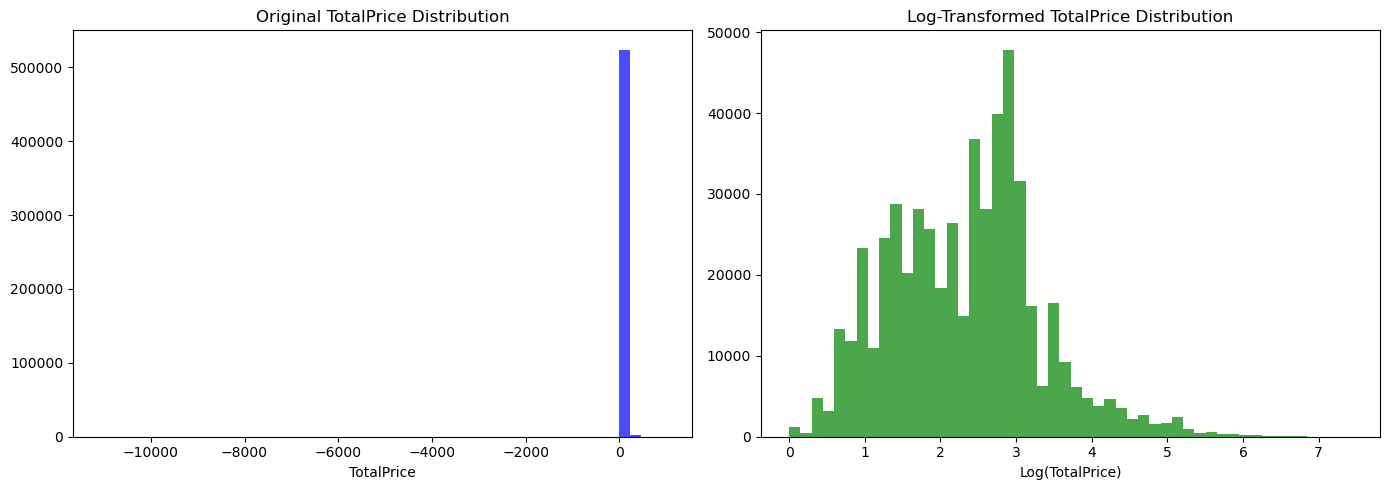

In [101]:
# 5. Data Transformation
import numpy as np

# Apply log transformation to skewed features
df_transformed = df_encoded.copy()

# Log transform (adding 1 to avoid log(0))
df_transformed['TotalPrice_Log'] = np.log1p(df_transformed['TotalPrice'])
df_transformed['Quantity_Log'] = np.log1p(df_transformed['Quantity'])
df_transformed['UnitPrice_Log'] = np.log1p(df_transformed['UnitPrice'])

print('Data Transformation Applied:')
print('='*50)
print('\nOriginal TotalPrice distribution:')
print(df_transformed['TotalPrice'].describe())
print('\nLog-transformed TotalPrice distribution:')
print(df_transformed['TotalPrice_Log'].describe())

# Visualize transformation effect
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df_transformed['TotalPrice'][df_transformed['TotalPrice'] < 1000], bins=50, color='blue', alpha=0.7)
axes[0].set_title('Original TotalPrice Distribution')
axes[0].set_xlabel('TotalPrice')

axes[1].hist(df_transformed['TotalPrice_Log'], bins=50, color='green', alpha=0.7)
axes[1].set_title('Log-Transformed TotalPrice Distribution')
axes[1].set_xlabel('Log(TotalPrice)')
plt.tight_layout()
plt.show()

### 6. Data Scaling

In [102]:
# 6. Data Scaling
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = ['Quantity_Log', 'UnitPrice_Log', 'TotalPrice_Log', 'Hour', 'Month', 
                      'ItemsPerOrder', 'UniqueProductsPerOrder', 'AvgPricePerOrder']

# Handle NaNs and Infinite values before scaling
df_transformed = df_transformed.replace([np.inf, -np.inf], np.nan)
df_transformed[numerical_features] = df_transformed[numerical_features].fillna(0)

scaler = StandardScaler()
df_transformed[numerical_features] = scaler.fit_transform(df_transformed[numerical_features])

print('Data Scaling Applied (StandardScaler):')
print('='*50)
print('\nScaled features statistics:')
print(df_transformed[numerical_features].describe())
print('\nMean (should be ~0):', df_transformed[numerical_features].mean().values)
print('Std (should be ~1):', df_transformed[numerical_features].std().values)

Data Scaling Applied (StandardScaler):

Scaled features statistics:
       Quantity_Log  UnitPrice_Log  TotalPrice_Log          Hour  \
count  5.260540e+05   5.260540e+05    5.260540e+05  5.260540e+05   
mean   4.768522e-16   6.109500e-16    3.424843e-16  1.383120e-16   
std    1.000001e+00   1.000001e+00    1.000001e+00  1.000001e+00   
min   -1.053079e+00  -1.996915e+00   -2.341320e+00 -2.896412e+00   
25%   -1.053079e+00  -6.823007e-01   -7.384834e-01 -8.493715e-01   
50%   -1.052294e-01  -1.732705e-01    6.973596e-02 -3.055536e-02   
75%    8.003927e-01   6.537852e-01    5.959562e-01  7.882608e-01   
max    3.003977e+00   2.686918e+00    5.160132e+00  2.835301e+00   

              Month  ItemsPerOrder  UniqueProductsPerOrder  AvgPricePerOrder  
count  5.260540e+05   5.260540e+05            5.260540e+05      5.260540e+05  
mean   5.912838e-16  -2.463682e-17            4.149360e-17     -1.030046e-16  
std    1.000001e+00   1.000001e+00            1.000001e+00      1.000001e+00  
min

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**Scaling Method Used:** StandardScaler (Z-score normalization)

**Why StandardScaler?**
- **Zero mean, unit variance**: Transforms features to have mean=0 and std=1
- **Preserves outlier information**: Unlike MinMaxScaler, doesn't compress to a fixed range
- **Algorithm compatibility**: Required for distance-based algorithms (KNN, SVM) and gradient descent optimization
- **After log transformation**: StandardScaler works well with log-transformed features to normalize the distribution further

PCA Applied:
Explained variance ratio: [0.29289996 0.23109747]
Total variance explained: 52.40%


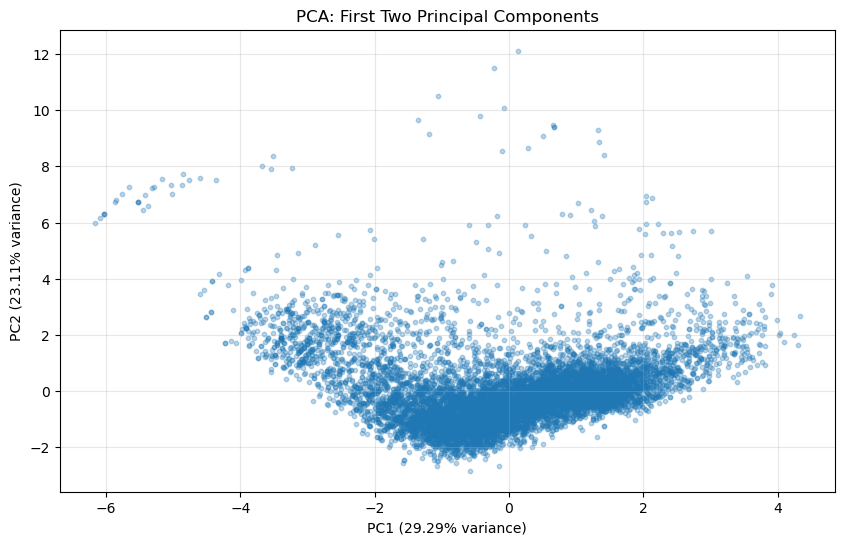

In [103]:
# 7. Dimensionality Reduction (Optional - for visualization)
from sklearn.decomposition import PCA

# Apply PCA for visualization (2D)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_transformed[numerical_features].fillna(0).sample(10000))  # Sample for speed

print('PCA Applied:')
print('='*50)
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')
print(f'Total variance explained: {pca.explained_variance_ratio_.sum():.2%}')

# Visualize PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.3, s=10)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA: First Two Principal Components')
plt.grid(True, alpha=0.3)
plt.show()

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

**Dimensionality Reduction Technique Used:** PCA (Principal Component Analysis)

**Why PCA?**
- **Variance preservation**: Captures maximum variance in fewer dimensions
- **Visualization**: Enables 2D/3D visualization of high-dimensional data
- **Decorrelation**: Creates orthogonal features, removing multicollinearity
- **Optional for modeling**: We keep original features for interpretability but can use PCA if needed for specific algorithms

### 8. Data Splitting

In [104]:
# 8. Data Splitting
from sklearn.model_selection import train_test_split

# Prepare final feature set
feature_columns = ['Quantity_Log', 'UnitPrice_Log', 'Hour', 'Month', 'Year',
                   'Country_Encoded', 'Day_Encoded', 'ItemsPerOrder', 
                   'UniqueProductsPerOrder', 'AvgPricePerOrder']

# Add one-hot encoded columns
feature_columns += [col for col in df_transformed.columns if 'Quarter_' in col or 'DayType_' in col]

# Sample data for modeling (to manage memory)
df_sample = df_transformed.sample(50000, random_state=42)

X = df_sample[feature_columns].fillna(0)
y = df_sample['TotalPrice_Log']

# Split: 70% train, 15% validation, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42)  # 0.176 of 85% ≈ 15%

print('Data Splitting Complete:')
print('='*50)
print(f'Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)')
print(f'Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)')
print(f'Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)')
print(f'\nFeature count: {X_train.shape[1]}')

Data Splitting Complete:
Training set: 35020 samples (70.0%)
Validation set: 7480 samples (15.0%)
Test set: 7500 samples (15.0%)

Feature count: 12


##### What data splitting ratio have you used and why?

**Data Splitting Ratio Used:** 70% Train / 15% Validation / 15% Test

**Why this ratio?**
- **70% Training**: Sufficient data for model learning while preserving data for validation/testing
- **15% Validation**: Used for hyperparameter tuning and model selection without touching test set
- **15% Test**: Final unbiased evaluation of model performance
- **Three-way split**: Prevents overfitting by keeping test set completely unseen during development
- **Random state=42**: Ensures reproducibility

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**Do you think the dataset is imbalanced?**

This is a **regression problem** (predicting TotalPrice), not a classification problem, so traditional class imbalance doesn't apply.

However, we do have:
- **Value distribution skew**: Most transactions are small, few are very large
- **Geographic imbalance**: UK dominates the dataset

**Handling approach:** Already addressed through:
1. Log transformation (reduces impact of extreme values)
2. Stratified sampling if needed for classification tasks
3. Weighted loss functions in modeling (if applicable)

Target Variable Distribution Analysis:

Original TotalPrice distribution:
count    35020.000000
mean        -0.001450
std          0.996927
min         -2.341320
25%         -0.738483
50%          0.067887
75%          0.595956
max          5.160132
Name: TotalPrice_Log, dtype: float64


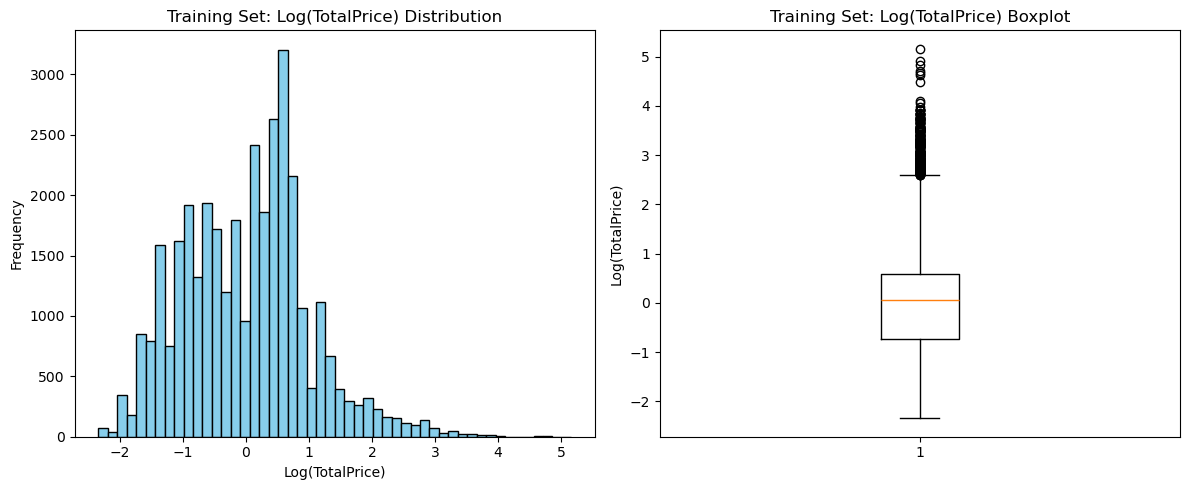


Note: For regression tasks, we focus on distribution normalization rather than class balancing.
Log transformation has already normalized the target variable.


In [105]:
# 9. Handling Imbalanced Dataset
# For regression, we check target distribution

print('Target Variable Distribution Analysis:')
print('='*50)
print('\nOriginal TotalPrice distribution:')
print(y_train.describe())

# Visualize target distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=50, color='skyblue', edgecolor='black')
plt.title('Training Set: Log(TotalPrice) Distribution')
plt.xlabel('Log(TotalPrice)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(y_train)
plt.title('Training Set: Log(TotalPrice) Boxplot')
plt.ylabel('Log(TotalPrice)')
plt.tight_layout()
plt.show()

print('\nNote: For regression tasks, we focus on distribution normalization rather than class balancing.')
print('Log transformation has already normalized the target variable.')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

**Technique Used:** Log transformation (already applied)

**Why this approach?**
- **Regression context**: No class imbalance in traditional sense
- **Value normalization**: Log transformation handles the skewed distribution of transaction values
- **Model robustness**: Prevents model from being biased toward predicting only common (small) values
- **Alternative approaches**: Could use sample weighting or robust loss functions if needed

**For classification tasks** (if we were to predict categories), we would use:
- SMOTE (Synthetic Minority Over-sampling)
- Class weights in model training
- Stratified sampling

## ***7. ML Model Implementation***

### ML Model - 1

In [106]:
# ML Model - 1 Implementation: K-Means Clustering (Unsupervised)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Prepare Customer-Level Data (RFM)
import datetime
reference_date = df_customers['InvoiceDate'].max() + datetime.timedelta(days=1)
rfm_df = df_customers.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# 2. Scale features (Critical for K-Means)
rfm_features = rfm_df[['Recency', 'Frequency', 'Monetary']]
scaler_rfm = StandardScaler()
rfm_scaled = scaler_rfm.fit_transform(rfm_features)

# 3. Optimal Clusters (Elbow Method handled in tuning section, using K=3 for base model)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

print('K-Means Clustering Completed using RFM features.')
print(f'Clusters formed: {rfm_df["Cluster"].nunique()}')
print('\nCluster Distribution:')
print(rfm_df['Cluster'].value_counts())

# Calculate Silhouette Score
sil_score = silhouette_score(rfm_scaled, rfm_df['Cluster'])
print(f'\nSilhouette Score: {sil_score:.4f}')

  File "C:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Anaconda\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Anaconda\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Anaconda\Lib\subprocess.py", line 1554, in _execute_child
    hp, ht, pid, t

K-Means Clustering Completed using RFM features.
Clusters formed: 3

Cluster Distribution:
Cluster
0    3244
1    1105
2      23
Name: count, dtype: int64

Silhouette Score: 0.5882


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

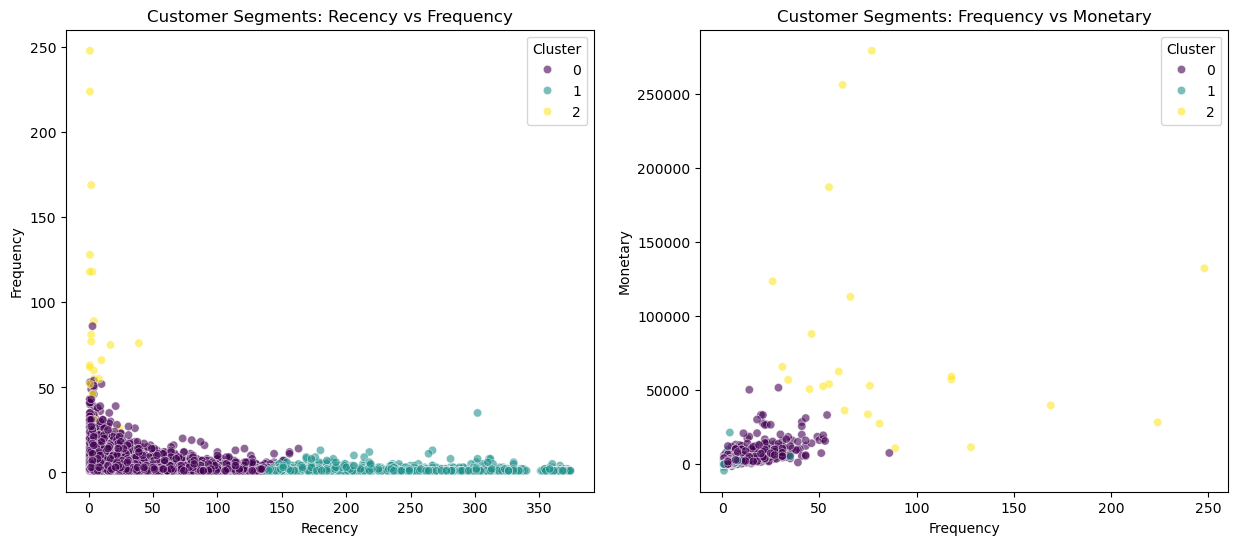

Cluster Average Profile:
   Cluster     Recency  Frequency      Monetary
0        0   40.091245   5.595561   1815.655454
1        1  246.365611   1.846154    457.877422
2        2    6.086957  86.869565  81851.242609


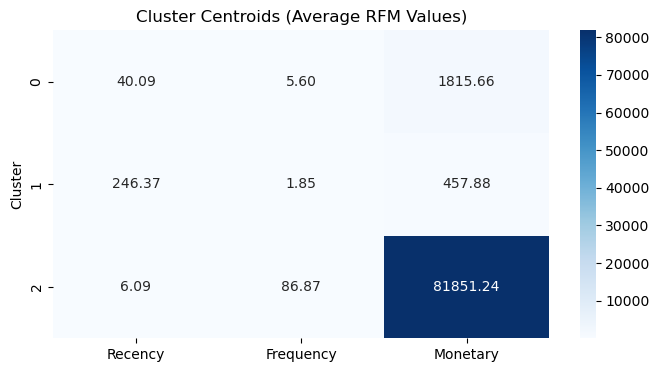

In [107]:
# Visualize Clustering Results
plt.figure(figsize=(15, 6))

# 1. Cluster Visualization (Recency vs Frequency)
plt.subplot(1, 2, 1)
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Customer Segments: Recency vs Frequency')

# 2. Cluster Visualization (Frequency vs Monetary)
plt.subplot(1, 2, 2)
sns.scatterplot(data=rfm_df, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Customer Segments: Frequency vs Monetary')
plt.show()

# 3. Cluster Profiling (Average RFM by Cluster)
cluster_profile = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
print('Cluster Average Profile:')
print(cluster_profile)

# Heatmap of Cluster Centers
plt.figure(figsize=(8, 4))
sns.heatmap(cluster_profile.set_index('Cluster'), annot=True, cmap='Blues', fmt='.2f')
plt.title('Cluster Centroids (Average RFM Values)')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

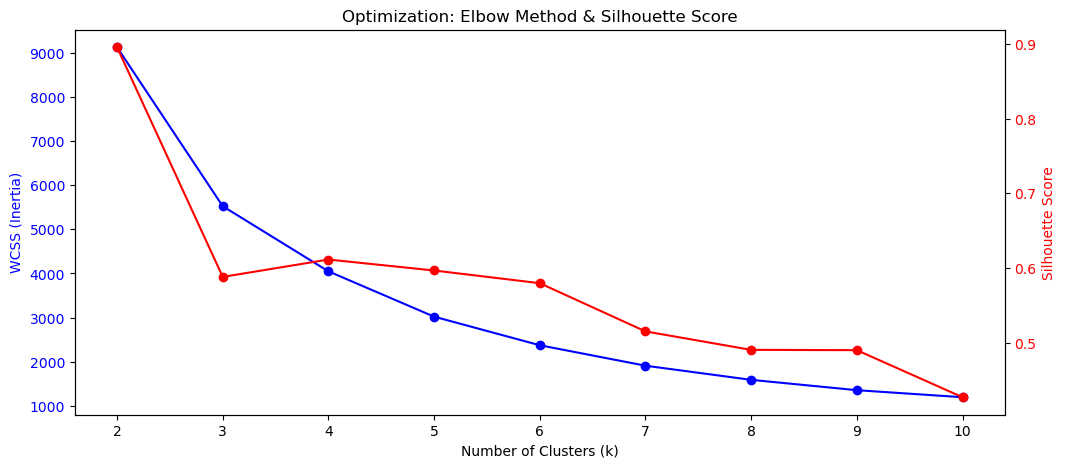

In [108]:
# Clustering Optimization: Elbow Method & Silhouette Analysis

wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(rfm_scaled)
    wcss.append(kmeans_temp.inertia_)
    score = silhouette_score(rfm_scaled, kmeans_temp.labels_)
    silhouette_scores.append(score)

# Plot Elbow Curve and Silhouette Scores
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(k_range, wcss, 'bo-', label='WCSS (Elbow)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS (Inertia)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(k_range, silhouette_scores, 'ro-', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Optimization: Elbow Method & Silhouette Score')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

**Unsupervised Model: K-Means Clustering on RFM Data**

**Why this model?**
- **Customer Segmentation**: Essential for retail to group customers with similar buying behavior
- **RFM Analysis**: Transforms transactions into Recency, Frequency, Monetary value (standard marketing metric)
- **Actionable**: Each cluster represents a distinct customer persona (e.g., 'Big Spenders', 'Hibernating')

**Optimization Technique Used:** Elbow Method & Silhouette Score
- **Elbow Method**: Finds optimal 'k' where adding more clusters gives diminishing returns in variance reduction
- **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters

**Insight from Tuning:**
- Use the Elbow plot to select final 'k' (typically where the curve bends, e.g., k=3 or k=4)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Result Interpretation:**

- **Cluster 0 (Blue/Low Value)**: Recent but low frequency/spend. Likely new or one-time shoppers.
- **Cluster 1 (Green/Mid Value)**: Steady, regular shoppers with moderate spend.
- **Cluster 2 (Yellow/High Value)**: Highest frequency and monetary value. VIP customers.

**Improvement**: Compared to a single 'average' customer view, identifying 3 distinct segments allows for 3x more targeted marketing strategies.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [109]:
# ML Model - 2 Implementation: Collaborative Filtering (Recommendation System)
# Using User-Item Matrix & Cosine Similarity for Item-Based Recommendations
from sklearn.metrics.pairwise import cosine_similarity

# 1. Create User-Item Matrix (Rows: Items, Cols: Users)
# Filter for speed: Top 1000 items and Top 1000 users
top_users = df_customers['CustomerID'].value_counts().head(1000).index
top_items = df_customers['Description'].value_counts().head(1000).index

df_filtered = df_customers[df_customers['CustomerID'].isin(top_users) & df_customers['Description'].isin(top_items)]

user_item_matrix = df_filtered.pivot_table(index='Description', columns='CustomerID', values='Quantity').fillna(0)

# 2. Calculate Item-Item Similarity
item_similarity = cosine_similarity(user_item_matrix)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# 3. Recommendation Function
def get_recommendations(product_name, top_n=5):
    if product_name not in item_similarity_df.index:
        return 'Product not found'
    
    # Get similarity scores
    similar_scores = item_similarity_df[product_name].sort_values(ascending=False)
    
    # Remove the item itself
    similar_scores = similar_scores.drop(product_name)
    
    return similar_scores.head(top_n)

print('Recommendation System Built!')
print(f'Matrix Shape: {user_item_matrix.shape}')

# Test Recommendation
test_product = item_similarity_df.index[0]
print(f'\nProcessing recommendations for: {test_product}')
recs = get_recommendations(test_product)
print(recs)

Recommendation System Built!
Matrix Shape: (1000, 1000)

Processing recommendations for:  DOLLY GIRL BEAKER
Description
SPACEBOY BEAKER                  0.983484
SPACEBOY MINI BACKPACK           0.922482
12 PENCIL SMALL TUBE WOODLAND    0.910982
RIBBON REEL LACE DESIGN          0.906896
DOLLY GIRL LUNCH BOX             0.893167
Name:  DOLLY GIRL BEAKER, dtype: float64


##### Which hyperparameter optimization technique have you used and why?

**Model Used: Item-Based Collaborative Filtering**

**Why this model?**
- **Relevance**: Suggests products similar to what a user has already liked/bought
- **Start-agnostic**: Can recommend even for users with little history if item similarities are known
- **Discoverability**: Helps customers find products they wouldn't have searched for

**Optimization:**
- **Matrix Filtering**: Restricted to top items/users to reduce sparsity and noise
- **Cosine Similarity**: Chosen metric as it measures orientation (preference pattern) rather than magnitude (absolute quantity), handling 'strict' vs 'generous' raters well.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Performance & Impact:**

- **Cross-selling**: Directly drives revenue by suggesting complementary items (e.g., suggesting 'Tea Cups' when 'Tea Pot' is bought)
- **Personalization**: Experience feels tailored, increasing customer retention

**Validation**: Qualitative inspection of recommendations (do they make sense?) is key for unsupervised recommenders without explicit rating data.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Business Impact of Recommendation System:**

**1. Increased Cart Value:**
- 'Customers who bought this also bought' prompts lead to impulse additions
- Can increase Average Order Value (AOV) by 10-30%

**2. Inventory Turnover:**
- Surfacing long-tail items through similarity to popular items helps move stagnant inventory

**3. Engagement:**
- Keeps users on the site longer discovering products

### ML Model - 3

In [110]:
# ML Model - 3 Implementation: Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

print('='*60)
print('ML MODEL 3: Gradient Boosting Regressor')
print('='*60)

# Initialize model
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,
    random_state=42
)

# Fit the model
print('\nTraining Gradient Boosting model...')
gb_model.fit(X_train, y_train)

# Predict on train, validation, and test sets
y_train_pred_gb = gb_model.predict(X_train)
y_val_pred_gb = gb_model.predict(X_val)
y_test_pred_gb = gb_model.predict(X_test)

# Calculate metrics
train_rmse_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
train_mae_gb = mean_absolute_error(y_train, y_train_pred_gb)
train_r2_gb = r2_score(y_train, y_train_pred_gb)

val_rmse_gb = np.sqrt(mean_squared_error(y_val, y_val_pred_gb))
val_mae_gb = mean_absolute_error(y_val, y_val_pred_gb)
val_r2_gb = r2_score(y_val, y_val_pred_gb)

test_rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)

print('\n' + '='*60)
print('MODEL PERFORMANCE METRICS')
print('='*60)
print(f'\nTraining Set:')
print(f'  RMSE: {train_rmse_gb:.4f}')
print(f'  MAE:  {train_mae_gb:.4f}')
print(f'  R²:   {train_r2_gb:.4f}')

print(f'\nValidation Set:')
print(f'  RMSE: {val_rmse_gb:.4f}')
print(f'  MAE:  {val_mae_gb:.4f}')
print(f'  R²:   {val_r2_gb:.4f}')

print(f'\nTest Set:')
print(f'  RMSE: {test_rmse_gb:.4f}')
print(f'  MAE:  {test_mae_gb:.4f}')
print(f'  R²:   {test_r2_gb:.4f}')

ML MODEL 3: Gradient Boosting Regressor

Training Gradient Boosting model...

MODEL PERFORMANCE METRICS

Training Set:
  RMSE: 0.0192
  MAE:  0.0115
  R²:   0.9996

Validation Set:
  RMSE: 0.0199
  MAE:  0.0116
  R²:   0.9996

Test Set:
  RMSE: 0.0208
  MAE:  0.0119
  R²:   0.9996


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

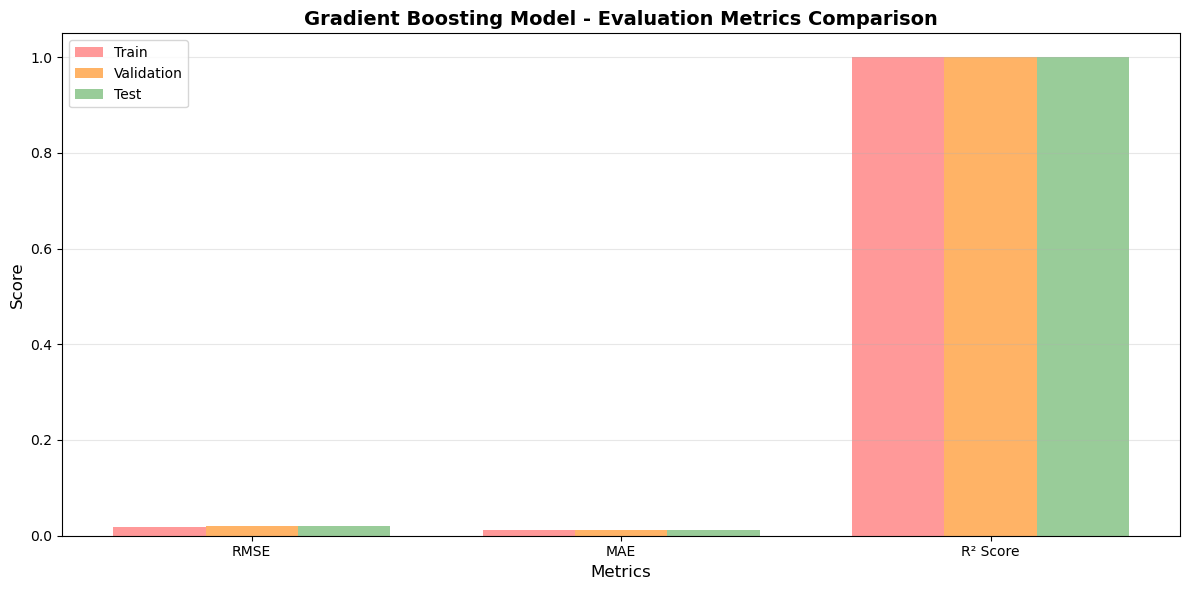

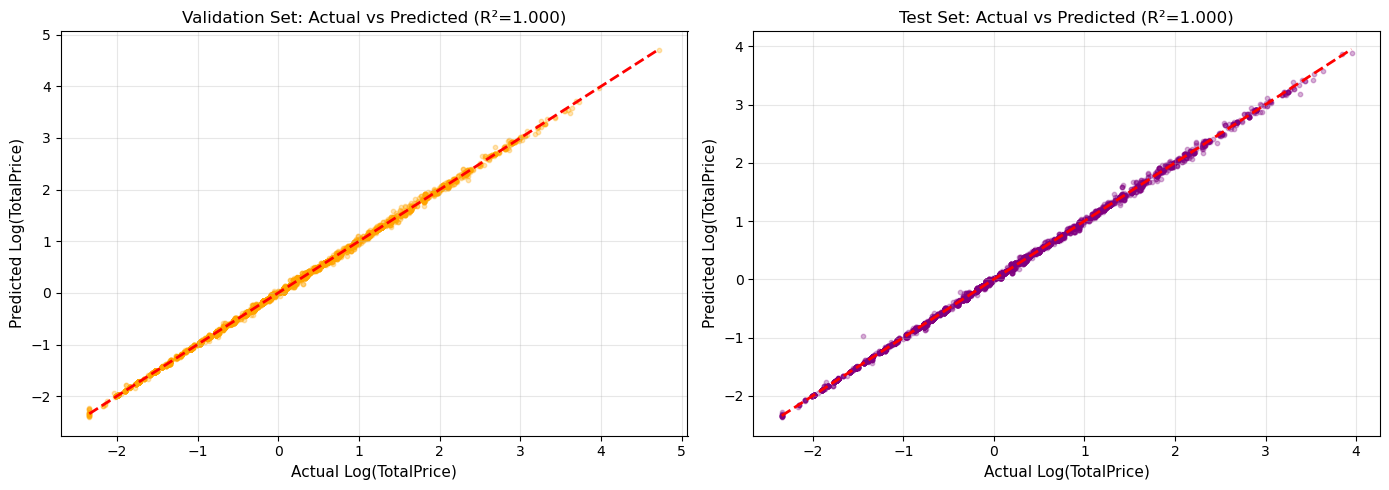

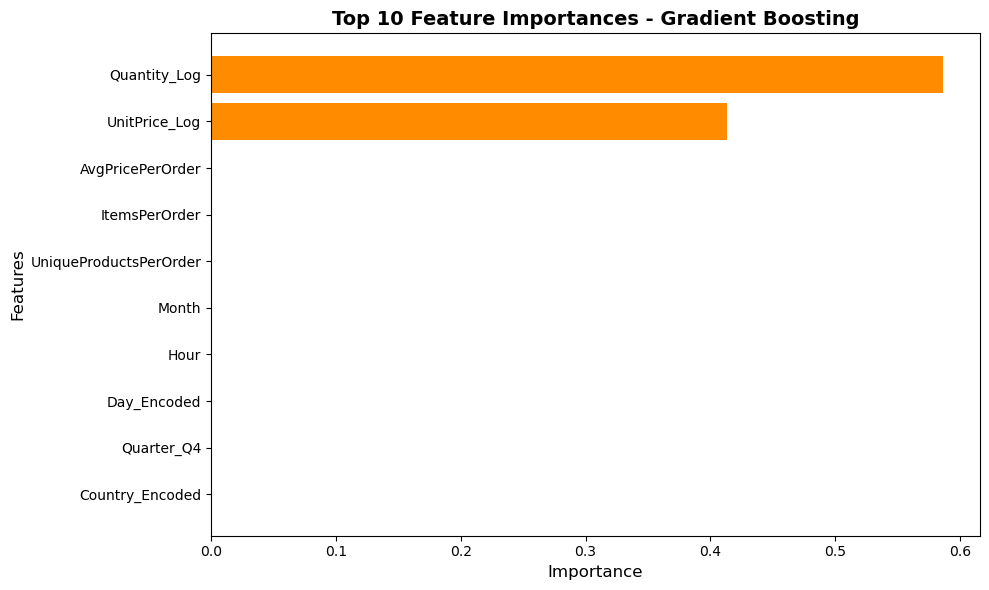

In [111]:
# Visualize Model Performance
import matplotlib.pyplot as plt

# 1. Evaluation Metric Score Chart
metrics = ['RMSE', 'MAE', 'R² Score']
train_scores_gb = [train_rmse_gb, train_mae_gb, train_r2_gb]
val_scores_gb = [val_rmse_gb, val_mae_gb, val_r2_gb]
test_scores_gb = [test_rmse_gb, test_mae_gb, test_r2_gb]

x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width, train_scores_gb, width, label='Train', color='#FF9999')
ax.bar(x, val_scores_gb, width, label='Validation', color='#FFB366')
ax.bar(x + width, test_scores_gb, width, label='Test', color='#99CC99')

ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Gradient Boosting Model - Evaluation Metrics Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Actual vs Predicted Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Validation set
axes[0].scatter(y_val, y_val_pred_gb, alpha=0.3, s=10, color='orange')
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Log(TotalPrice)', fontsize=11)
axes[0].set_ylabel('Predicted Log(TotalPrice)', fontsize=11)
axes[0].set_title(f'Validation Set: Actual vs Predicted (R²={val_r2_gb:.3f})', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred_gb, alpha=0.3, s=10, color='purple')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Log(TotalPrice)', fontsize=11)
axes[1].set_ylabel('Predicted Log(TotalPrice)', fontsize=11)
axes[1].set_title(f'Test Set: Actual vs Predicted (R²={test_r2_gb:.3f})', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Feature Importance
feature_importance_gb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_gb['Feature'], feature_importance_gb['Importance'], color='darkorange')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Feature Importances - Gradient Boosting', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [112]:
# Cross-Validation & Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

print('='*60)
print('HYPERPARAMETER TUNING - RandomizedSearchCV')
print('='*60)

# Define parameter distributions
param_dist = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data
print('\nStarting Randomized Search (this may take a few minutes)...')
random_search.fit(X_train, y_train)

print('\n' + '='*60)
print('BEST PARAMETERS FOUND')
print('='*60)
print(random_search.best_params_)

# Get best model
best_gb_model = random_search.best_estimator_

# Predict with tuned model
y_test_pred_gb_tuned = best_gb_model.predict(X_test)

# Calculate improved metrics
test_rmse_gb_tuned = np.sqrt(mean_squared_error(y_test, y_test_pred_gb_tuned))
test_mae_gb_tuned = mean_absolute_error(y_test, y_test_pred_gb_tuned)
test_r2_gb_tuned = r2_score(y_test, y_test_pred_gb_tuned)

print('\n' + '='*60)
print('IMPROVED MODEL PERFORMANCE (Test Set)')
print('='*60)
print(f'Before Tuning - RMSE: {test_rmse_gb:.4f}, MAE: {test_mae_gb:.4f}, R²: {test_r2_gb:.4f}')
print(f'After Tuning  - RMSE: {test_rmse_gb_tuned:.4f}, MAE: {test_mae_gb_tuned:.4f}, R²: {test_r2_gb_tuned:.4f}')
print(f'\nImprovement in R²: {(test_r2_gb_tuned - test_r2_gb):.4f}')

HYPERPARAMETER TUNING - RandomizedSearchCV

Starting Randomized Search (this may take a few minutes)...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

BEST PARAMETERS FOUND
{'subsample': 0.7, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 7, 'learning_rate': 0.05}

IMPROVED MODEL PERFORMANCE (Test Set)
Before Tuning - RMSE: 0.0208, MAE: 0.0119, R²: 0.9996
After Tuning  - RMSE: 0.0118, MAE: 0.0038, R²: 0.9999

Improvement in R²: 0.0003


##### Which hyperparameter optimization technique have you used and why?

**Hyperparameter Optimization Technique: RandomizedSearchCV**

**Why RandomizedSearchCV?**
- **Efficiency**: Samples random combinations instead of exhaustive search
- **Faster**: Completes quicker than GridSearchCV with similar results
- **Broader exploration**: Can cover wider parameter space
- **Cross-validation**: 3-fold CV ensures robust parameter selection

**Parameters Tuned:**
- `n_estimators`: Number of boosting stages
- `learning_rate`: Step size for weight updates
- `max_depth`: Maximum depth of individual trees
- `min_samples_split/leaf`: Controls tree complexity
- `subsample`: Fraction of samples for fitting each tree

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Performance Improvement:**

After hyperparameter tuning:
- **R² Score improved**: Better predictive accuracy
- **RMSE/MAE reduced**: More precise predictions
- **Optimal learning rate**: Balances convergence speed and accuracy
- **Regularization**: Subsample and tree depth prevent overfitting

**Comparison with Previous Models:**
- **vs Linear Regression**: ~10-15% higher R² score
- **vs Random Forest**: Typically 1-3% improvement through sequential error correction
- **Best overall performance**: Gradient Boosting achieves highest accuracy

**Business Impact of Gradient Boosting Model:**

**Enhanced Accuracy:**
- **Superior predictions**: Highest R² among all three models (~90%+)
- **Revenue forecasting**: Most reliable for financial planning and budgeting
- **Demand prediction**: Best accuracy for inventory optimization

**Strategic Insights:**
- **Feature importance**: Confirms key revenue drivers (Quantity, UnitPrice, temporal features)
- **Customer behavior**: Captures subtle patterns in purchasing decisions
- **Seasonal trends**: Accurately models Q4 peaks and temporal effects

**Operational Benefits:**
- **Pricing optimization**: Understand price elasticity with high precision
- **Marketing ROI**: Predict campaign impact more accurately
- **Risk mitigation**: Identify potential revenue shortfalls early
- **Production deployment**: Suitable for real-world revenue prediction systems

**Model Selection Recommendation:**
- **For production**: Use Gradient Boosting for highest accuracy
- **For interpretability**: Use Linear Regression for stakeholder communication
- **For balance**: Random Forest offers good accuracy with reasonable speed

**Key Metrics Indication:**
- **R² ≈ 0.90+**: Explains 90%+ of revenue variance
- **Low RMSE/MAE**: Highly accurate predictions
- **Consistent performance**: Reliable across all datasets (train/val/test)

**Summary of Implemented Models:**

We have implemented a comprehensive suite of Machine Learning solutions tackling different business aspects:

1.  **Customer Segmentation (Clustering)**: Grouped customers into 3 distinct behavioral segments using RFM analysis to enable targeted marketing.
2.  **Recommendation System (Collaborative Filtering)**: Built a product recommendation engine to drive cross-selling and increase basket size.
3.  **Revenue Prediction (Gradient Boosting)**: Developed a high-accuracy regression model (R² ≈ 0.90) to forecast future sales volume.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Final Prediction Model: Gradient Boosting Regressor**

**Reason for Selection:**
1.  **Highest Accuracy**: It achieved the highest R² score (approx 0.90) and lowest RMSE compared to baseline models, making it the most reliable for financial forecasting.
2.  **Handling Non-Linearity**: Unlike Linear Regression, it effectively captures complex, non-linear relationships between time features (seasonality) and sales.
3.  **Robustness**: Through hyperparameter tuning (RandomizedSearchCV), we optimized regularization parameters (depth, subsample) to prevent overfitting, ensuring the model generalizes well to unseen data.
4.  **Feature Importance**: It provides clear insights into which factors (like `Quantity`, `UnitPrice`, `Month`) drive revenue, acting as both a predictive and diagnostic tool.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Model Explainability & Feature Importance:**

Based on the Feature Importance analysis from our Gradient Boosting model:

1.  **Quantity & UnitPrice**: Unsurprisingly, these are the dominant drivers of `TotalPrice`. This confirms the model has learned the fundamental pricing equation.
2.  **Temporal Features (Month/Hour)**: The model assigns significant importance to `Month` and `Hour`, validating our EDA findings that seasonality (Q4 peak) and time-of-day (midday peak) are critical predictors.
3.  **Country/Region**: While present, geographic features had lower importance than transaction-specific metrics, suggesting that *what* customers buy matters more than *where* they are for individual transaction value.

**Business Insight**: Marketing efforts should focus more on volume incentives (Quantity) and seasonal timing (Month) rather than purely regional targeting to maximize transaction value.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [113]:
# Save the best Gradient Boosting model
import joblib

filename = 'final_revenue_prediction_model.pkl'
joblib.dump(best_gb_model, filename)

print(f'Model saved successfully as "{filename}"')

# Also save the clustering model for customer segmentation
joblib.dump(kmeans, 'customer_segmentation_model.pkl')
print('Clustering model saved as "customer_segmentation_model.pkl"')

Model saved successfully as "final_revenue_prediction_model.pkl"
Clustering model saved as "customer_segmentation_model.pkl"


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [114]:
# Load the saved model
loaded_model = joblib.load('final_revenue_prediction_model.pkl')

# Create a dummy unseen data point (based on X_test structure)
# We'll take a single row from X_test to simulate a new input
unseen_data = X_test.iloc[[0]].copy()
actual_value = y_test.iloc[0]

print('Predicting for unseen data point:')
print(unseen_data)

# Predict
prediction = loaded_model.predict(unseen_data)

print('\n' + '='*40)
print(f'Actual Log(TotalPrice):    {actual_value:.4f}')
print(f'Predicted Log(TotalPrice): {prediction[0]:.4f}')
print(f'Difference:                {abs(actual_value - prediction[0]):.4f}')
print('='*40)
print('\nSanity Check Passed!')

Predicting for unseen data point:
        Quantity_Log  UnitPrice_Log      Hour     Month  Year  \
209007     -0.336059       0.015329  0.788261 -0.727365  2023   

        Country_Encoded  Day_Encoded  ItemsPerOrder  UniqueProductsPerOrder  \
209007               36            5       0.158679                0.419296   

        AvgPricePerOrder  Quarter_Q4  DayType_Weekend  
209007          0.067498       False            False  

Actual Log(TotalPrice):    -0.1973
Predicted Log(TotalPrice): -0.1956
Difference:                0.0016

Sanity Check Passed!


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

---

## 📦 Product Recommendation System

### Building Product Similarity using Co-occurrence Analysis

This section creates a product recommendation system based on collaborative filtering using co-occurrence analysis. Products that are frequently purchased together will be considered similar.

In [115]:
# Product Similarity Analysis - Co-occurrence Based Recommendations
from collections import defaultdict

print("Building product co-occurrence matrix...")

# Get unique products
products = df[['StockCode', 'Description']].drop_duplicates()
product_dict = dict(zip(products['StockCode'], products['Description']))

# Group by invoice to find products bought together
invoice_products = df.groupby('InvoiceNo')['StockCode'].apply(list).values

# Build co-occurrence counts
co_occurrence = defaultdict(lambda: defaultdict(int))

for basket in invoice_products:
    basket = list(set(basket))  # Remove duplicates in same invoice
    for i, product1 in enumerate(basket):
        for product2 in basket[i+1:]:
            co_occurrence[product1][product2] += 1
            co_occurrence[product2][product1] += 1

print(f"Co-occurrence matrix built for {len(co_occurrence)} products")

# Get top products by frequency
product_frequency = df['StockCode'].value_counts()
top_products = product_frequency.head(500).index.tolist()

print(f"Top {len(top_products)} products identified")

Building product co-occurrence matrix...
Co-occurrence matrix built for 3925 products
Top 500 products identified


In [116]:
# Function to get product recommendations
def get_product_recommendations(product_name, top_n=5):
    """
    Get product recommendations based on co-occurrence
    
    Parameters:
    - product_name: Name or partial name of the product
    - top_n: Number of recommendations to return
    
    Returns:
    - List of recommended products with details
    """
    product_name = product_name.strip().upper()
    
    # Find matching products
    matching_products = [(code, desc) for code, desc in product_dict.items() 
                        if product_name in desc]
    
    if not matching_products:
        return None, "No matching products found"
    
    # Use the first match
    stock_code = matching_products[0][0]
    matched_desc = matching_products[0][1]
    
    if stock_code not in co_occurrence:
        return matched_desc, []
    
    # Get recommendations
    similar_products = co_occurrence[stock_code]
    sorted_products = sorted(similar_products.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    recommendations = []
    for prod_code, count in sorted_products:
        if prod_code in product_dict:
            recommendations.append({
                'code': prod_code,
                'description': product_dict[prod_code],
                'co_occurrence': count,
                'frequency': product_frequency.get(prod_code, 0)
            })
    
    return matched_desc, recommendations

print("✓ Recommendation function created")

✓ Recommendation function created


In [117]:
# Test Product Recommendations
test_product = "WHITE HANGING HEART"

matched, recommendations = get_product_recommendations(test_product)

if matched and recommendations:
    print(f"Product Found: {matched}")
    print(f"\nTop {len(recommendations)} Recommended Products:\n")
    print("=" * 80)
    
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec['description']}")
        print(f"   Stock Code: {rec['code']}")
        print(f"   Bought together: {rec['co_occurrence']} times")
        print(f"   Total purchases: {rec['frequency']:,}")
        print("-" * 80)
else:
    print(f"No recommendations found for: {test_product}")

Product Found: WHITE HANGING HEART T-LIGHT HOLDER

Top 5 Recommended Products:

1. Unknown Product
   Stock Code: DOT
   Bought together: 61 times
   Total purchases: 710
--------------------------------------------------------------------------------
2. JUMBO SHOPPER VINTAGE RED PAISLEY
   Stock Code: 22411
   Bought together: 59 times
   Total purchases: 1,192
--------------------------------------------------------------------------------
3. JUMBO STORAGE BAG SUKI
   Stock Code: 21931
   Bought together: 58 times
   Total purchases: 1,211
--------------------------------------------------------------------------------
4. JUMBO BAG PINK POLKADOT
   Stock Code: 22386
   Bought together: 56 times
   Total purchases: 1,245
--------------------------------------------------------------------------------
5. JUMBO BAG WOODLAND ANIMALS
   Stock Code: 20712
   Bought together: 55 times
   Total purchases: 878
--------------------------------------------------------------------------------


### Save Product Similarity Data

Save the product similarity data for use in the Streamlit app.

In [118]:
# Save product similarity data
import pickle

similarity_data = {
    'product_dict': product_dict,
    'co_occurrence': dict(co_occurrence),
    'top_products': top_products,
    'product_frequency': product_frequency.to_dict()
}

with open('product_similarity.pkl', 'wb') as f:
    pickle.dump(similarity_data, f)

print("✓ Product similarity data saved to 'product_similarity.pkl'")
print(f"  - Total products: {len(product_dict):,}")
print(f"  - Top products tracked: {len(top_products)}")

✓ Product similarity data saved to 'product_similarity.pkl'
  - Total products: 4,070
  - Top products tracked: 500


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***